In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns #data visualization

In [3]:
# importing data
# if moving to google collab, make sure to look at path of data set
pok_dem = pd.read_csv("E:/CAP5768/project/pokemon_complete.csv")
pok_com = pd.read_csv("E:/CAP5768/project/combats.csv")
pok_id = pd.read_csv("E:/CAP5768/project/pokemon_id.csv")
pok_id2 = pok_id.rename(index=str, columns={"#": "Number", "Name": "name"})
#pok_id2.columns

In [8]:
pok_dem.shape, pok_com.shape, pok_id.shape

((801, 41), (50000, 3), (800, 12))

In [4]:
pokemon = pok_dem.merge(pok_id2[['name','Number']], how='left', on='name')
pokemon.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary', 'Number'],
      dtype='object')

Since I am merging data sets, I want to see what is missing in between my data sets when it comes to the column I want to add into my main data set. in this case, I am trying to get the combat id (the index value that matches the pokemon with its battle partner and winnner in the combats data set) into my main pokemon data set which has all the stats (or demographics) of a pokemon. So, the resulting names are the ones that are not given an ID and were not considered in the combat id dataset

In [5]:
pok_dem['name'].isin(pok_id2['name']).value_counts()

True     703
False     98
Name: name, dtype: int64

In [6]:
pok_common = pok_dem.loc[pok_dem['name'].isin(pok_id2['name'])]
pok_common.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [7]:
no_id = pok_dem.drop(labels=pok_common.index, axis=0)
no_id.shape
#98 pokemon that its name was not considered in the combat id dataset

(98, 41)

In [13]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 800
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [14]:
pok_com.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [8]:
print("Dimenstions of Pokemon: " + str(pokemon.shape))
print("Dimenstions of Combat: " + str(pok_com.shape))
print(len(pok_com['First_pokemon'].unique()))
print(len(pok_com['Second_pokemon'].unique()))

Dimenstions of Pokemon: (801, 42)
Dimenstions of Combat: (50000, 3)
784
784


Generation is which season of the show the pokemon come out. Think of it as a similar concept to "baby boomers" and "millennials"
Type 2 there is are NA values. Some Pokemon have secondary classification. For example, one pokemon might be able to breath fire and fly. So its Type 1 would be 'fire' but it would also can fly so its Type 2 would be 'flying'. Some poemon don't have a secondary type, thus the NA value. There are 386 pokemon without a Type 2.
There is one name that is missing. We will want to explore that instance, maybe we can fix it.
There are 800 different pokemon in the dataset and 50k battles recorded

In [16]:
# checking for missing values
pokemon.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [17]:
pok_com.isnull().sum()

First_pokemon     0
Second_pokemon    0
Winner            0
dtype: int64

the features that have missing data points are:
height_m              20
percentage_male       98
type2                384
weight_kg             20
Number                98

we may not really need these values/ we may remove them later, so I will continue on with merging the rest of the data sets and come back to this later

In [9]:
# calculate the win % of each pokemon 
# add the calculation to the pokemon dataset 
total_Wins = pok_com.Winner.value_counts()
# get the number of wins for each pokemon
numberOfWins = pok_com.groupby('Winner').count()

#both methods produce the same results
countByFirst = pok_com.groupby('Second_pokemon').count()
countBySecond = pok_com.groupby('First_pokemon').count()
print("Looking at the dimensions of our dataframes")
print("Count by first winner shape: " + str(countByFirst.shape))
print("Count by second winner shape: " + str(countBySecond.shape))
print("Total Wins shape : " + str(total_Wins.shape))


Looking at the dimensions of our dataframes
Count by first winner shape: (784, 2)
Count by second winner shape: (784, 2)
Total Wins shape : (783,)


In [19]:
numberOfWins.columns

Index(['First_pokemon', 'Second_pokemon'], dtype='object')

We can see that the number of dimensions is different in the total wins. This can only mean there is one pokemon that was unable to win during it's fights. Lets find the pokemon that did not win a single fight.

In [10]:
find_losing_pokemon= np.setdiff1d(countByFirst.index.values, numberOfWins.index.values) #offset because the index and number are off by one
losing_ = pokemon.loc[pokemon['Number'] == find_losing_pokemon[0]]
print(losing_)
#losing_pokemon = pokemon.iloc[find_losing_pokemon[0]]
#print(type(find_losing_pokemon[0]))

                              abilities  against_bug  against_dark  \
212  ['Sturdy', 'Gluttony', 'Contrary']          1.0           1.0   

     against_dragon  against_electric  against_fairy  against_fight  \
212             1.0               1.0            1.0            1.0   

     against_fire  against_flying  against_ghost  ...  pokedex_number  \
212           1.0             1.0            1.0  ...             213   

     sp_attack  sp_defense  speed  type1  type2  weight_kg  generation  \
212         10         230      5    bug   rock       20.5           2   

     is_legendary  Number  
212             0   231.0  

[1 rows x 42 columns]


In [11]:
numberOfWins['Total Fights'] = countByFirst.Winner + countBySecond.Winner
numberOfWins['Win Percentage']= numberOfWins.First_pokemon/numberOfWins['Total Fights']

# merge the winning dataset and the original pokemon dataset
#results2 = pd.merge(pokemon, numberOfWins, right_index = True, left_on='Number')
results3 = pd.merge(pokemon, numberOfWins, left_on='Number', right_index = True, how='left')
results3.shape

(801, 46)

In [12]:
# We can look at the difference between the two datasets to see which pokemon never recorded a fight
#subset the dataframe where pokemon win percent is NaN
no_win = results3[results3['Win Percentage'].isnull()]
#no_win.shape (113, 46)
no_win.index

Int64Index([  8,  26,  39,  56,  59,  70,  81, 131, 167, 212,
            ...
            791, 792, 793, 794, 795, 796, 797, 798, 799, 800],
           dtype='int64', length=113)

Since these pokemon did not have any recorded wins, I will remove them from this data and use them for a test set.

In [13]:
results4 = results3.drop(no_win.index)
results4.shape

(688, 46)

Now that all of the data sets have been merged and organized... I will start taking out a few colmns to help simplify visualizations as well as our training process as we do not think some of the features will help with our overall goal in predicting win percentage

columns to drop:
japanese_name: The Original Japanese name of the Pokemon
percentage_male: The percentage of the species that are male. Blank if the Pokemon is genderless.
classification: The Classification of the Pokemon as described by the Sun and Moon Pokedex
abilities: A stringified list of abilities that the Pokemon is capable of having
against_?: Eighteen features that denote the amount of damage taken against an attack of a particular type
First Pokemon
Second Pokemon


look at to see if there is a relationship first
base_egg_steps: The number of steps required to hatch an egg of the Pokemon
experience_growth: The Experience Growth of the Pokemon

Now, I am going to come back to those missing values that we have yet to address form the beginning:

height_m              20
percentage_male       98
type2                384
weight_kg             20
Number                98


Type 2 there is are NA values. Some Pokemon have secondary classification. For example, one pokemon might be able to breath fire and fly. So its Type 1 would be 'fire' but it would also can fly so its Type 2 would be 'flying'. Some poemon don't have a secondary type, thus the NA value. There are 384 pokemon without a Type 2.

with the missing values of the Number feature, it means that there were 98 pokemon not included in the id set but were recorded in the demographics set, thus was not recorded in a battle with our combats set. Addtionally, we see now that there are 113 pokemon who did not have a win percentage. So, that means that an additonal 15 pokemon (whether they were given an id or not) were not included in the combats data set. In the end, 113 pokemon cannot be used for testing thus we may drop these values for now

for the height, percentage in male, and weight, there are some pokemon who might have a missing height or weight due to them being a legendary creature since (in the game) people cannot approach those kinds of pokemon so they could not record those metrics

some pokemon do not have genders, therefore they would not have a male percentage

To deal with the type 2 null values, I will put that as a None category.

for the height, weight, and percentage male, those metrics (in the game) are not actually used when the algorithm is determining who will win in the battle, and since there are some null values, I do not believe these feature should be taken into account in our analysis.

In [14]:
# replacing na values in college with No college
results4["type2"].fillna("none", inplace = True)
#results4.isnull().sum()
results4['type2'].unique()

array(['poison', 'none', 'flying', 'dark', 'electric', 'ice', 'ground',
       'fairy', 'grass', 'fighting', 'psychic', 'steel', 'fire', 'rock',
       'water', 'dragon', 'ghost', 'bug', 'normal'], dtype=object)

In [15]:
p1 = results4.drop(['height_m', 'weight_kg', 'percentage_male'], axis=1)
pokemon1 = p1.drop(['japanese_name', 'First_pokemon', 'Second_pokemon', 'classfication', 'abilities'], axis=1)#, , , 'base_egg_steps',  , , ])
#pokemon1.head()
pokemon2 = pokemon1.drop(['against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water'], axis=1)
pokemon2.head()
pokemon2.columns

Index(['attack', 'base_egg_steps', 'base_happiness', 'base_total',
       'capture_rate', 'defense', 'experience_growth', 'hp', 'name',
       'pokedex_number', 'sp_attack', 'sp_defense', 'speed', 'type1', 'type2',
       'generation', 'is_legendary', 'Number', 'Total Fights',
       'Win Percentage'],
      dtype='object')

In [16]:
# I am just going to rearrange the columns to have a better understanding of the data
pokemon3 = pokemon2[['pokedex_number', 'Number', 'name',  'type1', 'type2', 'attack', 'defense', 'sp_attack', 'sp_defense', 
                    'speed', 'hp','base_total', 'base_egg_steps', 'base_happiness', 'capture_rate',  
                    'experience_growth', 'generation', 'is_legendary', 'Total Fights', 'Win Percentage']]
pokemon3.head()

,pokedex_number,Number,name,type1,type2,attack,defense,sp_attack,sp_defense,speed,hp,base_total,base_egg_steps,base_happiness,capture_rate,experience_growth,generation,is_legendary,Total Fights,Win Percentage
0,1,1.0,Bulbasaur,grass,poison,49,49,65,65,45,45,318,5120,70,45,1059860,1,0,133.0,0.278195
1,2,2.0,Ivysaur,grass,poison,62,63,80,80,60,60,405,5120,70,45,1059860,1,0,121.0,0.380165
2,3,3.0,Venusaur,grass,poison,100,123,122,120,80,80,625,5120,70,45,1059860,1,0,132.0,0.674242
3,4,5.0,Charmander,fire,none,52,43,60,50,65,39,309,5120,70,45,1059860,1,0,112.0,0.491071
4,5,6.0,Charmeleon,fire,none,64,58,80,65,80,58,405,5120,70,45,1059860,1,0,118.0,0.542373


In [27]:
pokemon3.isnull().sum()

pokedex_number       0
Number               0
name                 0
type1                0
type2                0
attack               0
defense              0
sp_attack            0
sp_defense           0
speed                0
hp                   0
base_total           0
base_egg_steps       0
base_happiness       0
capture_rate         0
experience_growth    0
generation           0
is_legendary         0
Total Fights         0
Win Percentage       0
dtype: int64

In [28]:
pokemon3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688 entries, 0 to 720
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pokedex_number     688 non-null    int64  
 1   Number             688 non-null    float64
 2   name               688 non-null    object 
 3   type1              688 non-null    object 
 4   type2              688 non-null    object 
 5   attack             688 non-null    int64  
 6   defense            688 non-null    int64  
 7   sp_attack          688 non-null    int64  
 8   sp_defense         688 non-null    int64  
 9   speed              688 non-null    int64  
 10  hp                 688 non-null    int64  
 11  base_total         688 non-null    int64  
 12  base_egg_steps     688 non-null    int64  
 13  base_happiness     688 non-null    int64  
 14  capture_rate       688 non-null    object 
 15  experience_growth  688 non-null    int64  
 16  generation         688 non

In [29]:
pokemon3.columns

Index(['pokedex_number', 'Number', 'name', 'type1', 'type2', 'attack',
       'defense', 'sp_attack', 'sp_defense', 'speed', 'hp', 'base_total',
       'base_egg_steps', 'base_happiness', 'capture_rate', 'experience_growth',
       'generation', 'is_legendary', 'Total Fights', 'Win Percentage'],
      dtype='object')

The last thing for data cleaning is just to make the categorical variables readble to the algorithms we decide to use

In [17]:
lb = preprocessing.LabelBinarizer()
df = pokemon3.join(pd.DataFrame(lb.fit_transform(pokemon3["type1"]),
                          columns=lb.classes_, 
                          index=pokemon3.index))
df.columns

pokemon_clean = df.join(pd.DataFrame(lb.fit_transform(df["type2"]),
                          columns=lb.classes_, 
                          index=df.index,
                          ), rsuffix='2')
pokemon_clean.columns

pd.to_numeric(pokemon_clean['capture_rate'])
pokemon_clean['capture_rate'] = pokemon_clean['capture_rate'].astype(int)
print(pokemon_clean['capture_rate'].dtypes)

int32


In [18]:
pokemon_clean = pokemon_clean.drop(['type1', 'type2'], axis= 1)
pokemon_clean.columns

Index(['pokedex_number', 'Number', 'name', 'attack', 'defense', 'sp_attack',
       'sp_defense', 'speed', 'hp', 'base_total', 'base_egg_steps',
       'base_happiness', 'capture_rate', 'experience_growth', 'generation',
       'is_legendary', 'Total Fights', 'Win Percentage', 'bug', 'dark',
       'dragon', 'electric', 'fairy', 'fighting', 'fire', 'flying', 'ghost',
       'grass', 'ground', 'ice', 'normal', 'poison', 'psychic', 'rock',
       'steel', 'water', 'bug2', 'dark2', 'dragon2', 'electric2', 'fairy2',
       'fighting2', 'fire2', 'flying2', 'ghost2', 'grass2', 'ground2', 'ice2',
       'none', 'normal2', 'poison2', 'psychic2', 'rock2', 'steel2', 'water2'],
      dtype='object')

In [32]:
pokemon_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688 entries, 0 to 720
Data columns (total 55 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pokedex_number     688 non-null    int64  
 1   Number             688 non-null    float64
 2   name               688 non-null    object 
 3   attack             688 non-null    int64  
 4   defense            688 non-null    int64  
 5   sp_attack          688 non-null    int64  
 6   sp_defense         688 non-null    int64  
 7   speed              688 non-null    int64  
 8   hp                 688 non-null    int64  
 9   base_total         688 non-null    int64  
 10  base_egg_steps     688 non-null    int64  
 11  base_happiness     688 non-null    int64  
 12  capture_rate       688 non-null    int32  
 13  experience_growth  688 non-null    int64  
 14  generation         688 non-null    int64  
 15  is_legendary       688 non-null    int64  
 16  Total Fights       688 non

In [33]:
pokemon_clean.to_csv(r'E:/CAP5768/project/pokemon_data_clean.csv')

Really quickly, I wanted go take in a closer look at these features to see if we should keep them in the data set or not as these are not typical stats that people look at when choosing a pokemon to fight but could have some kind of relationship with out target variable

Columns referenced:
base_egg_steps: The number of steps required to hatch an egg of the Pokemon
experience_growth: The Experience Growth of the Pokemon
capture_rate: Capture Rate of the Pokemon
base_happiness: Base Happiness of the Pokemon

In [34]:
#pokemon3['base_happiness'].unique()
pokemon3['base_happiness'].describe()

count    688.000000
mean      66.417151
std       17.741606
min        0.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      140.000000
Name: base_happiness, dtype: float64

In [35]:
pokemon3['base_egg_steps'].describe()

count      688.000000
mean      6623.255814
std       5330.199248
min       1280.000000
25%       5120.000000
50%       5120.000000
75%       5120.000000
max      30720.000000
Name: base_egg_steps, dtype: float64

In [36]:
pokemon3['experience_growth'].describe()

count    6.880000e+02
mean     1.050007e+06
std      1.635460e+05
min      6.000000e+05
25%      1.000000e+06
50%      1.000000e+06
75%      1.059860e+06
max      1.640000e+06
Name: experience_growth, dtype: float64

In [37]:
pd.to_numeric(pokemon3['capture_rate'])
pokemon3['capture_rate'] = pokemon3['capture_rate'].astype(int)
pokemon3['capture_rate'].describe()

count    688.000000
mean     101.813953
std       76.263851
min        3.000000
25%       45.000000
50%       75.000000
75%      180.000000
max      255.000000
Name: capture_rate, dtype: float64

These statistics are not typically included when determining which pokemon would win battles, however, given that there is a range in which each category has as well as they are numerical, we thought it would be interesting to include these features in our analysis.

Now lets do some simple exploratory data analysis to find out more about our data. I will be using the pokemon3 dataset rather than the pokemon_clean dataset as categorical variables do not cause trouble within this type of analysis and it would be easier to visualize.

In [38]:
# top 10 with worst win percentage
lose10 = pokemon3[np.isfinite(pokemon3['Win Percentage'])].sort_values(by = ['Win Percentage']).head(10)
lose10

,pokedex_number,Number,name,type1,type2,attack,defense,sp_attack,sp_defense,speed,hp,base_total,base_egg_steps,base_happiness,capture_rate,experience_growth,generation,is_legendary,Total Fights,Win Percentage
265,266,290.0,Silcoon,bug,none,35,55,25,25,15,50,205,3840,70,120,1000000,3,0,138.0,0.021739
174,175,190.0,Togepi,fairy,none,20,65,40,65,20,35,245,2560,70,190,800000,2,0,122.0,0.024590
576,577,639.0,Solosis,psychic,none,30,40,105,50,20,45,290,5120,70,200,1059860,5,0,129.0,0.031008
217,218,237.0,Slugma,fire,none,40,40,70,40,20,40,250,5120,70,190,1000000,2,0,123.0,0.032520
516,517,577.0,Munna,psychic,none,25,45,67,55,24,76,292,2560,70,190,800000,5,0,128.0,0.039062
173,174,189.0,Igglybuff,normal,fairy,30,15,40,20,15,90,210,2560,70,170,800000,2,0,115.0,0.043478
359,360,395.0,Wynaut,psychic,none,23,48,23,48,23,95,260,5120,70,125,1000000,3,0,130.0,0.046154
193,194,210.0,Wooper,water,ground,45,45,25,25,15,55,210,5120,70,255,1000000,2,0,125.0,0.048000
267,268,292.0,Cascoon,bug,none,35,55,25,25,15,50,205,3840,70,120,1000000,3,0,133.0,0.052632
681,682,753.0,Spritzee,fairy,none,52,60,63,65,23,78,341,5120,70,200,1000000,6,0,133.0,0.060150


In [36]:
# top 10 with best win percentage
win10 = pokemon3[np.isfinite(pokemon3['Win Percentage'])].sort_values(by = ['Win Percentage'], ascending= False).head(10)
win10

,pokedex_number,Number,name,type1,type2,attack,defense,sp_attack,sp_defense,speed,hp,base_total,base_egg_steps,base_happiness,capture_rate,experience_growth,generation,is_legendary,Total Fights,Win Percentage
460,461,513.0,Weavile,dark,ice,120,65,45,85,125,70,510,5120,35,45,1059860,4,0,119.0,0.974790
141,142,154.0,Aerodactyl,rock,flying,135,85,70,95,150,80,615,8960,70,45,1250000,1,0,141.0,0.964539
657,658,727.0,Greninja,water,dark,145,67,153,71,132,72,640,5120,70,45,1059860,6,0,127.0,0.960630
490,491,550.0,Darkrai,dark,none,90,90,135,90,125,70,600,30720,0,3,1250000,4,1,117.0,0.940171
242,243,263.0,Raikou,electric,none,85,75,115,100,115,90,580,20480,35,3,1250000,2,1,97.0,0.938144
214,215,234.0,Sneasel,dark,ice,95,55,35,75,115,55,430,5120,35,60,1059860,2,0,113.0,0.938053
522,523,583.0,Zebstrika,electric,none,100,63,80,63,116,75,497,5120,70,75,1000000,5,0,107.0,0.934579
492,493,553.0,Arceus,normal,none,120,120,120,120,120,120,720,30720,0,3,1250000,4,1,122.0,0.934426
431,432,481.0,Purugly,normal,none,82,64,64,59,112,71,452,5120,70,75,800000,4,0,119.0,0.932773
714,715,792.0,Noivern,flying,dragon,70,80,97,80,123,85,535,5120,70,45,1000000,6,0,115.0,0.930435


In [39]:
lose10.mean()

C:\Users\sabyc\AppData\Local\Temp\ipykernel_19804\332872488.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  lose10.mean()


pokedex_number       3.431000e+02
Number               3.772000e+02
attack               3.350000e+01
defense              4.680000e+01
sp_attack            4.830000e+01
sp_defense           4.180000e+01
speed                1.900000e+01
hp                   6.140000e+01
base_total           2.508000e+02
base_egg_steps       4.096000e+03
base_happiness       7.000000e+01
capture_rate         1.201902e+28
experience_growth    9.459860e+05
generation           3.300000e+00
is_legendary         0.000000e+00
Total Fights         1.276000e+02
Win Percentage       3.993339e-02
dtype: float64

In [40]:
win10.mean()

C:\Users\sabyc\AppData\Local\Temp\ipykernel_19804\1185286932.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  win10.mean()


pokedex_number       4.373000e+02
Number               4.850000e+02
attack               1.042000e+02
defense              7.640000e+01
sp_attack            9.140000e+01
sp_defense           8.380000e+01
speed                1.233000e+02
hp                   7.880000e+01
base_total           5.579000e+02
base_egg_steps       1.216000e+04
base_happiness       4.550000e+01
capture_rate         4.545453e+15
experience_growth    1.097958e+06
generation           3.800000e+00
is_legendary         3.000000e-01
Total Fights         1.177000e+02
Win Percentage       9.448541e-01
dtype: float64

att 71
def 30
sp att 43
sp def 42
speed 104
hp 17

<AxesSubplot:>

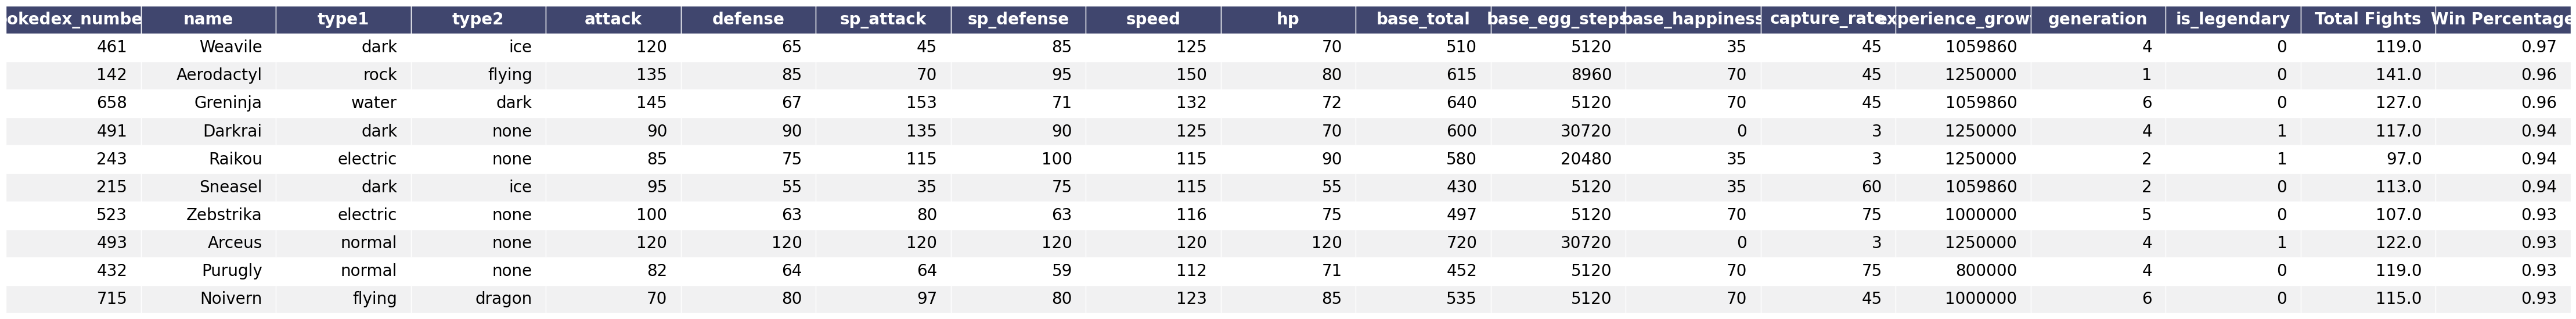

In [41]:
import six

def render_mpl_table(data,col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0, 
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, colLoc='center', **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

win10_cop = win10
win10_cop["Win Percentage"] = win10['Win Percentage'].round(decimals = 2)
win10_cop
render_mpl_table(win10_cop.drop(['Number'], axis=1), header_columns=0, font_size=20)

In [75]:
import dataframe_image as dfi

dfi.export(win10_cop, 'dataframe.png')

By simple comparison of the best and the worst pokemon (in win percentage), there is a clear difference that set the lower win percentages from the higher. For the basic stats (attack, speed, defense, special attack, special defense and hp), the top 10 pokemon all had higher stats than the lower 10 with the feature speed having the greatest difference (104) bewteen the averages of the top and bottom 10 pokemon. Hp had the smallest difference (17). Special defense and special attack ahd similar differences (42 and 43 respectively). The overall base total (a summary number of the basic stats) difference between the top 10 and bottom 10 pokemon is 307. Making it a very distinct difference in stats of the lower and higher 10 pokemon (with respect to win percentage).

A few other things to note is that for the lower 10, there seems to be little to no legendary pokemon, while in the higher 10 there seems to be at least 3. In the franchise, legendary pokemon are often rare and powerful pokemon that many of the characters in the ranchise respect and often worship becuase of their legends and powers. in this anaylsis, that may have a weight on how well a pokemon would perform in a battle, but it also may not be that significant (we will do more anaylsis further on in the project). Another note is that in the higher 10, there are more pokemon who have 2 types (5). The diversity in their types can allow them to have a wider bag of move sets (battle attacks they can use) which can have higher damage amounts than those who can only have a more limited set of moves if they only have 1 type.

Text(0.5, 1.0, 'Total Pokemon by Type 1')

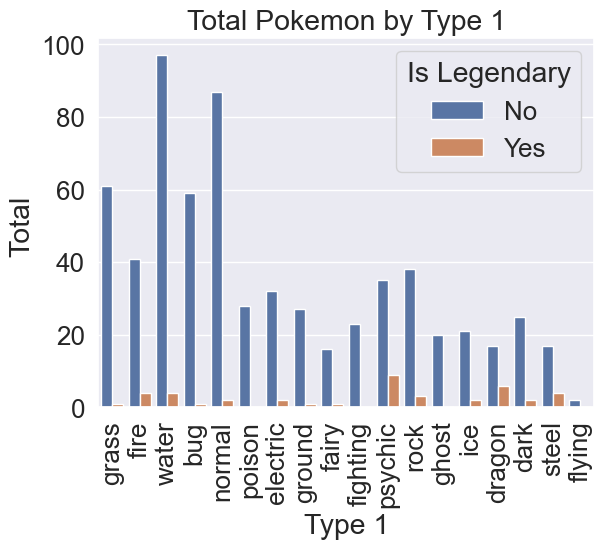

In [163]:
sns.set(font_scale=1.7)
sns.set_color_codes("pastel")
ax = sns.countplot(x="type1", hue="is_legendary", data=pokemon3)
#f.set_xticklabels(rotation=30)
plt.xticks(rotation= 90)
plt.xlabel('Type 1')
plt.ylabel('Total ')
plt.legend(title='Is Legendary', loc='upper right', labels=['No', 'Yes'])
plt.title("Total Pokemon by Type 1")

Text(0.5, 1.0, 'Total Pokemon by Type 2')

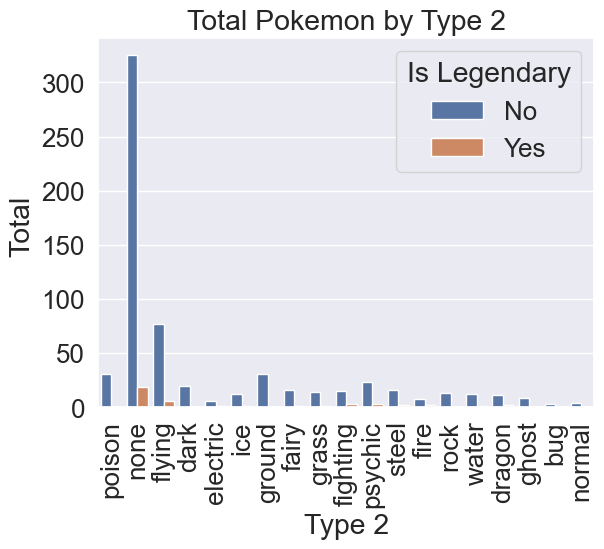

In [162]:
sns.set(font_scale=1.7)
ax = sns.countplot(x="type2", hue="is_legendary", data=pokemon3)
plt.xticks(rotation= 90)
plt.xlabel('Type 2')
plt.ylabel('Total ')
plt.legend(title='Is Legendary', loc='upper right', labels=['No', 'Yes'])
plt.title("Total Pokemon by Type 2")

Comparing the categorical variables, water, normal and grass seem to be the most common type 1 while flying, ground and poison are the most common for type 2. With this information, we can possibly see the probability of which type would be in the battle in which we can counter with the opposite type. For example, if there is fire type pokemon we can counter it with a water pokemon.

In [129]:
win_typ1 = pokemon3.groupby('type1').agg({"Win Percentage": "mean"}).sort_values(by = "Win Percentage")
win_typ1.index

Index(['fairy', 'rock', 'steel', 'grass', 'ice', 'ghost', 'bug', 'poison',
       'fighting', 'water', 'psychic', 'ground', 'normal', 'fire', 'dragon',
       'electric', 'dark', 'flying'],
      dtype='object', name='type1')

Text(0.5, 1.0, 'Win Percentage by Type 1')

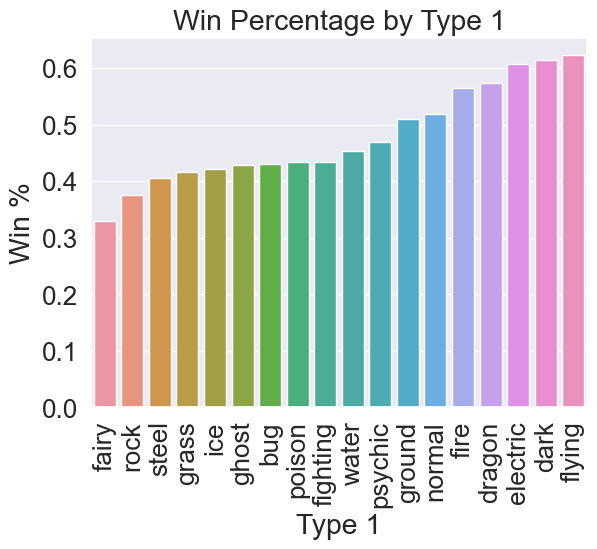

In [160]:
sns.set(font_scale=1.7)
ax = sns.barplot(x=win_typ1.index, y='Win Percentage', data=win_typ1)
plt.xticks(rotation= 90)
plt.xlabel('Type 1')
plt.ylabel('Win %')
#plt.legend(title='Is Legendary', loc='upper right', labels=['No', 'Yes'])
plt.title("Win Percentage by Type 1")

In [138]:
win_typ2 = pokemon3.groupby('type2').agg({"Win Percentage": "mean"}).sort_values(by = "Win Percentage")
win_typ2

,Win Percentage
type2,
rock,0.306528
grass,0.373065
fairy,0.377424
ground,0.377855
water,0.383980
poison,0.407551
ghost,0.426071
bug,0.439055
none,0.440856


Text(0.5, 1.0, 'Win Percentage by Type 2')

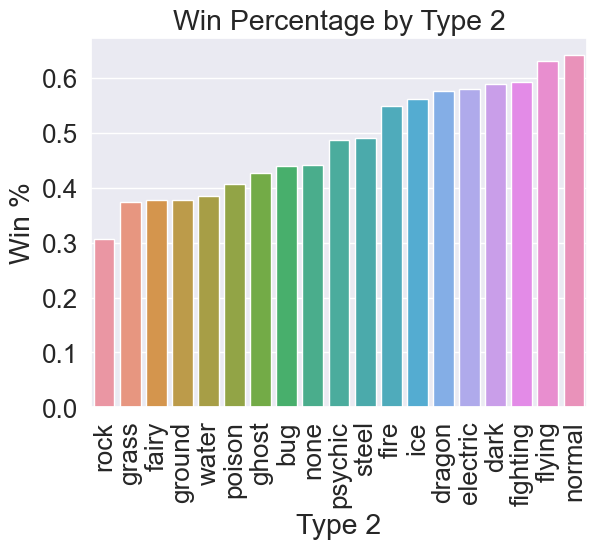

In [161]:
sns.set(font_scale=1.7)
ax = sns.barplot(x=win_typ2.index, y='Win Percentage', data=win_typ2)
plt.xticks(rotation= 90)
plt.xlabel('Type 2')
plt.ylabel('Win %')
#plt.legend(title='Is Legendary', loc='upper right', labels=['No', 'Yes'])
plt.title("Win Percentage by Type 2")

When looking at the relationship of types to the win percentage, the common types defined above seem to help define which types could win. The highest winning type 1 are electric, dark, and flying (which wins against water, bug, and grass). However, the highest type 2 are fighting, flying, and normal (which all of them has different win rate for different types that show no real pattern with the most common types).

Text(0.5, 1.0, 'Type 1 by Generation')

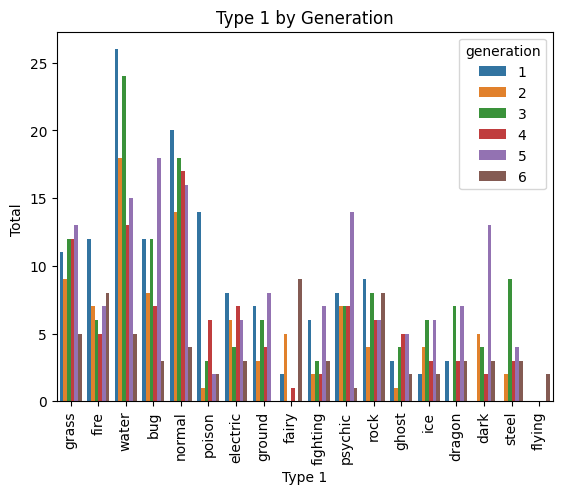

In [80]:
ax = sns.countplot(x="type1", hue="generation", data=pokemon3)
plt.xticks(rotation= 90)
plt.xlabel('Type 1')
plt.ylabel('Total ')
#plt.legend(title='', loc='upper right', labels=['No', 'Yes'])
plt.title("Type 1 by Generation")

In [31]:
win_gen = pokemon3.groupby('generation').agg({"Win Percentage": "mean"})#.sort_values(by = "Win Percentage")
win_gen

,Win Percentage
generation,
1,0.488872
2,0.440938
3,0.426250
4,0.517450
5,0.492192
6,0.465914


Text(0.5, 1.0, 'Win Percentage by Generation')

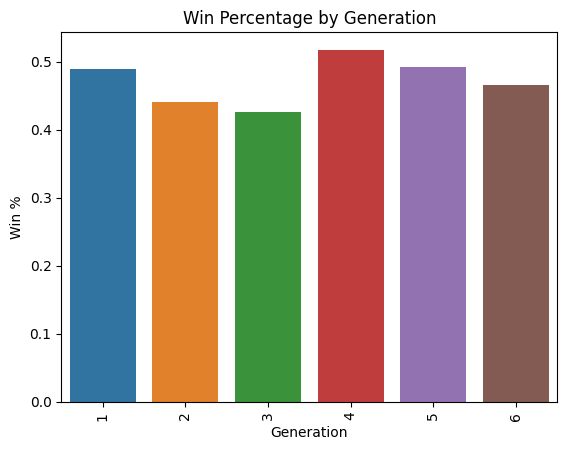

In [32]:
ax = sns.barplot(x=win_gen.index, y='Win Percentage', data=win_gen)
plt.xticks(rotation= 90)
plt.xlabel('Generation')
plt.ylabel('Win %')
#plt.legend(title='', loc='upper right', labels=['No', 'Yes'])
plt.title("Win Percentage by Generation")

In [20]:
win_leg = pokemon3.groupby('is_legendary').agg({"Win Percentage": "mean"})#.sort_values(by = "Win Percentage")
win_leg

,Win Percentage
is_legendary,
0,0.454428
1,0.756419


Text(0.5, 1.0, 'Win Percentage by Legendary')

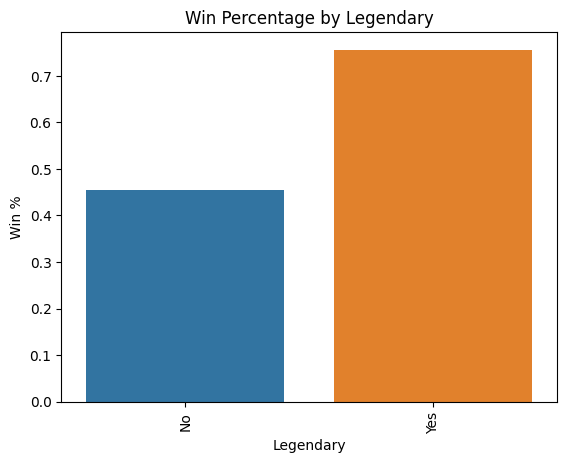

In [21]:
ax = sns.barplot(x=win_leg.index, y='Win Percentage',  data=win_leg)
ax.set_xticklabels(['No', 'Yes'])
plt.xticks(rotation= 90)
plt.xlabel('Legendary')
plt.ylabel('Win %')
#plt.legend(title='', loc='upper right', labels=['No', 'Yes'])
plt.title("Win Percentage by Legendary")

Text(0.5, 1.0, 'Win Percentage by Legendary')

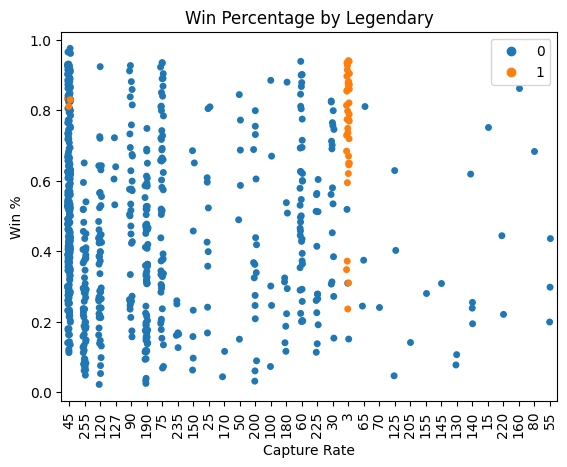

In [30]:
ax = sns.stripplot(x='capture_rate', y='Win Percentage', hue='is_legendary', data=pokemon3)
#ax.set_xticklabels(['No', 'Yes'])
plt.xticks(rotation= 90)
plt.xlabel('Capture Rate')
plt.ylabel('Win %')
plt.legend(loc='upper right')
plt.title("Win Percentage by Legendary")

In [33]:
col = ['attack','defense', 'sp_attack', 'sp_defense', 'speed', 'hp', 'base_total', 'base_egg_steps', 'base_happiness', 'capture_rate', 'experience_growth', 'Win Percentage']
corr = pokemon3.loc[:,col].corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
heat = (corr
 .style
 .background_gradient(cmap='coolwarm')
 .highlight_null('#f1f1f1')  # Color NaNs grey
 .set_precision(2)
 .set_table_attributes('style = "font-size: 50px"')
 .set_properties(**{'font-size':'40pt'})
 )

C:\Users\sabyc\AppData\Local\Temp\ipykernel_19804\780228663.py:10: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  .set_precision(2)


In [109]:
import dataframe_image as dfi

dfi.export(heat, 'heatmap.png')

C:\Users\sabyc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\formats\style.py:3555: RuntimeWarning:

All-NaN slice encountered

C:\Users\sabyc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\formats\style.py:3556: RuntimeWarning:

All-NaN slice encountered



<AxesSubplot:>

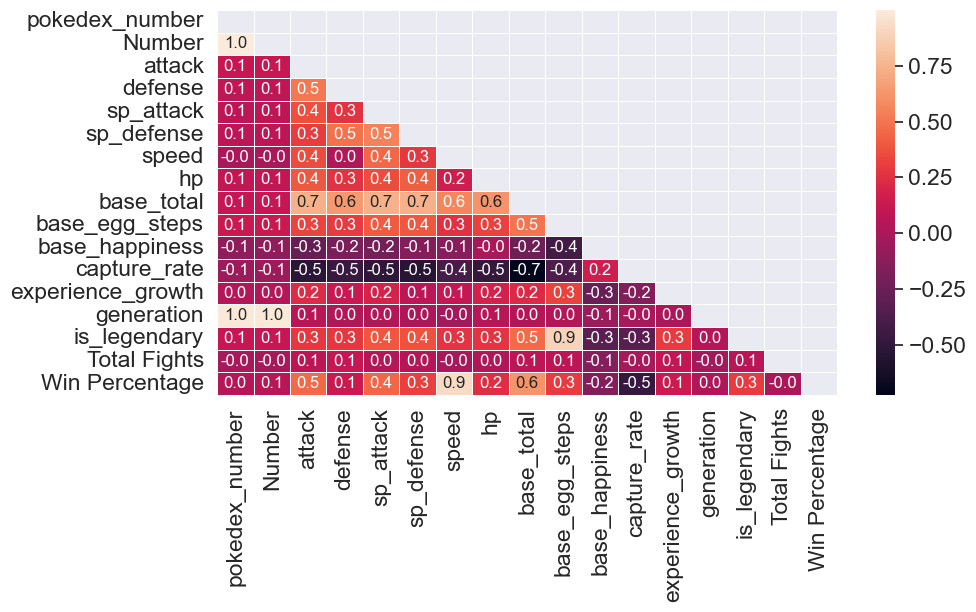

In [157]:
corr = pokemon3.corr()
mask = np.triu(np.ones_like(corr))
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(corr, fmt=".1f",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, mask=mask,
            annot=True, annot_kws={"fontsize":12},
            linewidth=.5
            )

Going into deeper analysis of the relationships between the numerical features and the win percentage, it seems as though speed and types of attacking seem to be the top contributors with the base total also being highly correlated with Win percentage. But that makes sense as the basic stats are highly correalted to base total.

C:\Users\sabyc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\regression\_tools.py:121: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\sabyc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\regression\_tools.py:121: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\sabyc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\nanfunctions.py:1583: RuntimeWarning:

All-NaN slice encountered



Text(0.5, 1.0, 'Speed vs Win Percentage by Type 1')

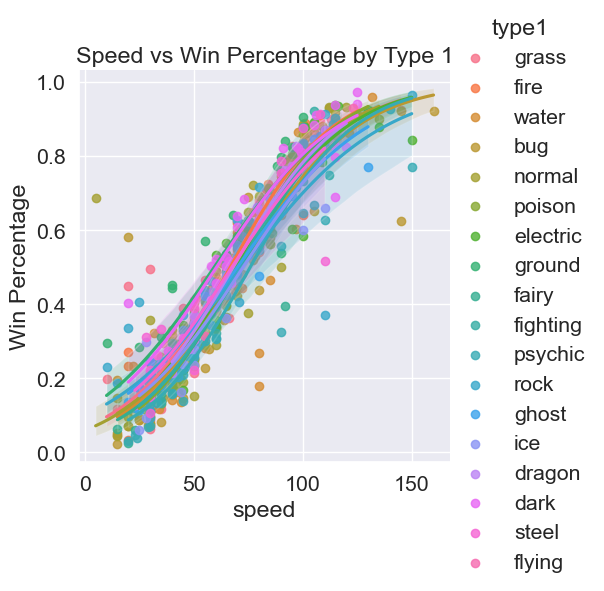

In [168]:
#f, (ax1, ax2) = plt.subplots(1,2)
sns.set(font_scale=1.4)
sns.lmplot(x="speed", y="Win Percentage", data=pokemon3, hue = 'type1', logistic=True)
ax = plt.gca()
ax.set_title("Speed vs Win Percentage by Type 1")

Text(0.5, 1.0, 'Speed vs Win Percentage by Type 2')

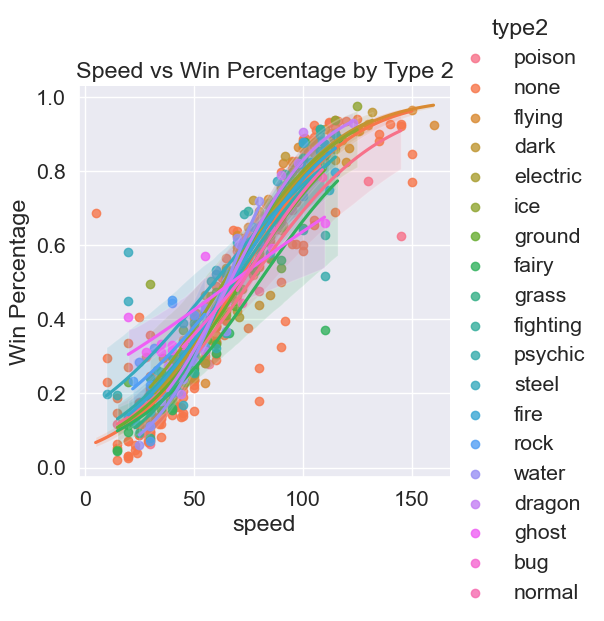

In [169]:
sns.set(font_scale=1.4)
sns.lmplot(x="speed", y="Win Percentage", data=pokemon3, hue = 'type2',  logistic=True)
ax = plt.gca()
ax.set_title("Speed vs Win Percentage by Type 2")

Text(0.5, 1.0, 'Attack vs Win Percentage by Type 1')

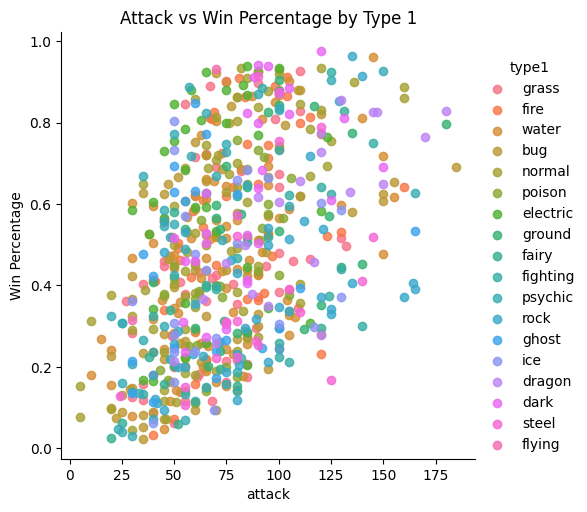

In [115]:
sns.lmplot(x="attack", y="Win Percentage", data=pokemon3, hue = 'type1', logistic=True, fit_reg=False)
ax = plt.gca()
ax.set_title("Attack vs Win Percentage by Type 1")

Text(0.5, 1.0, 'Attack vs Win Percentage by Type 2')

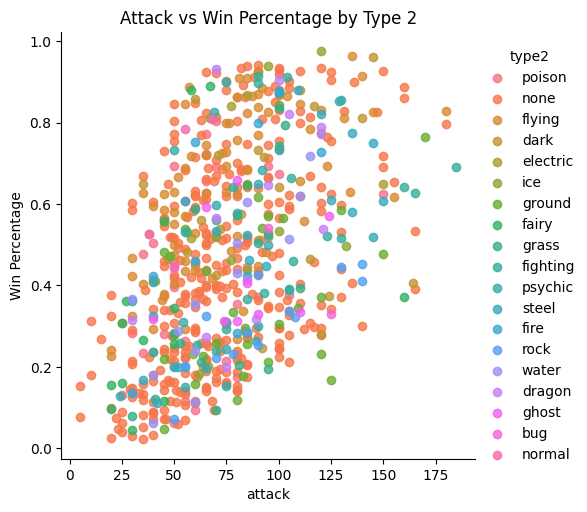

In [120]:
sns.lmplot(x="attack", y="Win Percentage", data=pokemon3, hue = 'type2',  logistic=True, fit_reg=False)
ax = plt.gca()
ax.set_title("Attack vs Win Percentage by Type 2")

Text(0.5, 1.0, 'Special Attack vs Win Percentage by Type 1')

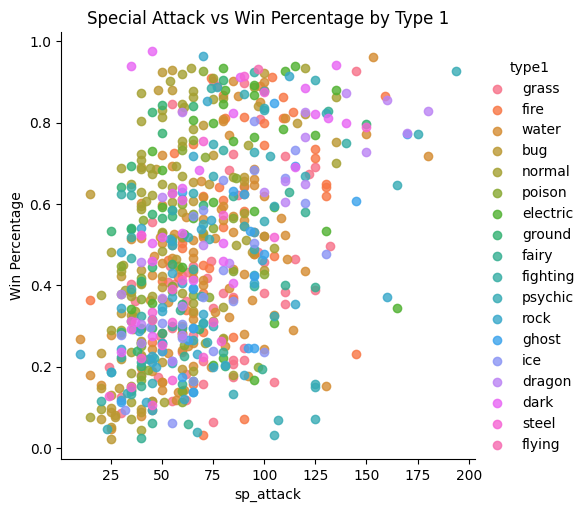

In [117]:
sns.lmplot(x="sp_attack", y="Win Percentage", data=pokemon3, hue = 'type1', logistic=True, fit_reg=False)
ax = plt.gca()
ax.set_title("Special Attack vs Win Percentage by Type 1")

Text(0.5, 1.0, 'Special Attack vs Win Percentage by Type 2')

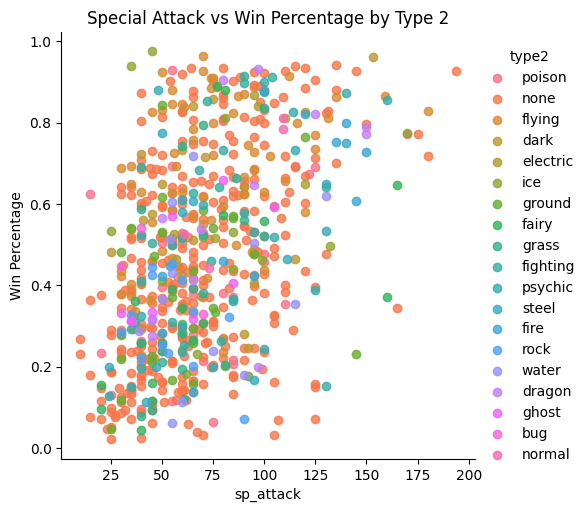

In [121]:
sns.lmplot(x="sp_attack", y="Win Percentage", data=pokemon3, hue = 'type2',  logistic=True, fit_reg=False)
ax = plt.gca()
ax.set_title("Special Attack vs Win Percentage by Type 2")

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt # data visualization
#import matplotlib.pyplot as plt
import seaborn as sns #data visualization
import random 

random.seed(1)

In [3]:
# Import the dataset
pokemon = pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\IDS project\pokemon_data_clean.csv")
# rename the column with a pound sign/hashtag as "number" its name
# The reason for this is when  we try and access this column later it will comment out the code


In [8]:
print(pokemon_df.columns)

Index(['pokedex_number', 'Number', 'name', 'attack', 'defense', 'sp_attack',
       'sp_defense', 'speed', 'hp', 'base_total', 'base_egg_steps',
       'base_happiness', 'capture_rate', 'experience_growth', 'generation',
       'is_legendary', 'Total Fights', 'Win Percentage', 'bug', 'dark',
       'dragon', 'electric', 'fairy', 'fighting', 'fire', 'flying', 'ghost',
       'grass', 'ground', 'ice', 'normal', 'poison', 'psychic', 'rock',
       'steel', 'water', 'bug2', 'dark2', 'dragon2', 'electric2', 'fairy2',
       'fighting2', 'fire2', 'flying2', 'ghost2', 'grass2', 'ground2', 'ice2',
       'none', 'normal2', 'poison2', 'psychic2', 'rock2', 'steel2', 'water2'],
      dtype='object')


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score, f1_score
import matplotlib.pyplot as plt

# Load the Pokemon dataset
pokemon_df = pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\IDS project\pokemon_data_clean.csv")

# Drop the 'Unnamed: 0', 'Number', and 'name' columns as they are not relevant for classification
pokemon_df = pokemon_df.drop(['Unnamed: 0', 'Number', 'name'], axis=1)

# Split the data into features and labels
X = pokemon_df.drop(['is_legendary'], axis=1)
y = pokemon_df['is_legendary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter grid to search over
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 1e-3],
    'degree': [2, 3, 4],
    'coef0': [-1, 0, 1]
}

# Create the SVM classifier
svc = SVC()

# Create the GridSearchCV object
grid_search = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_scaled, y_train)

# Predict the test set labels
y_pred = grid_search.predict(X_test_scaled)

# Evaluate the performance of the model
print("Accuracy score: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best score: {:.2f}".format(grid_search.best_score_))

# Calculate and print the MAE, MSE, and R^2
print("Mean absolute error: {:.2f}".format(mean_absolute_error(y_test, y_pred)))
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, y_pred)))
print("R^2 score: {:.2f}".format(r2_score(y_test, y_pred)))

# Calculate the baseline accuracy
baseline_accuracy = max(y_test.mean(), 1 - y_test.mean())
print("Baseline accuracy: {:.2f}".format(baseline_accuracy))

# Calculate and plot the F1 score for each feature
f1_scores = []
for col in X.columns:
    X_col = X[[col]]
    X_train_col, X_test_col, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_col_scaled = scaler.fit_transform(X_train_col)
    X_test_col_scaled = scaler.transform(X_test_col)
   


Accuracy score: 0.99
Confusion matrix:
 [[130   0]
 [  1   7]]
Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       130
           1       1.00      0.88      0.93         8

    accuracy                           0.99       138
   macro avg       1.00      0.94      0.96       138
weighted avg       0.99      0.99      0.99       138

Best parameters: {'C': 10, 'coef0': 1, 'degree': 4, 'gamma': 0.001, 'kernel': 'poly'}
Best score: 1.00
Mean absolute error: 0.01
Mean squared error: 0.01
R^2 score: 0.87
Baseline accuracy: 0.94


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the Pokemon dataset
pokemon_df = pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\IDS project\pokemon_data_clean.csv")

# Drop the 'Unnamed: 0', 'Number', and 'name' columns as they are not relevant for regression
pokemon_df = pokemon_df.drop(['Unnamed: 0', 'Number', 'name'], axis=1)

# Split the data into features and labels
X = pokemon_df.drop(['Win Percentage'], axis=1)
y = pokemon_df['Win Percentage']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter grid to search over
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 1e-3],
    'degree': [2, 3, 4],
    'coef0': [-1, 0, 1]
}

# Create the SVR regressor
svr = SVR()

# Calculate the baseline metrics
baseline_predictions = np.full_like(y_test, y_train.mean())
baseline_r2 = r2_score(y_test, baseline_predictions)
baseline_mae = mean_absolute_error(y_test, baseline_predictions)
baseline_mse = mean_squared_error(y_test, baseline_predictions)

# Perform a random search over the hyperparameter space
random_search = RandomizedSearchCV(svr, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1, random_state=42)
random_search.fit(X_train_scaled, y_train)
random_search_r2 = r2_score(y_test, random_search.predict(X_test_scaled))
random_search_mae = mean_absolute_error(y_test, random_search.predict(X_test_scaled))
random_search_mse = mean_squared_error(y_test, random_search.predict(X_test_scaled))

# Perform a grid search over the hyperparameter space
grid_search = GridSearchCV(svr, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
grid_search_r2 = r2_score(y_test, grid_search.predict(X_test_scaled))
grid_search_mae = mean_absolute_error(y_test, grid_search.predict(X_test_scaled))
grid_search_mse = mean_squared_error(y_test, grid_search.predict(X_test_scaled))

# Print the results in a table
results_df = pd.DataFrame({'Baseline': [baseline_r2, baseline_mae, baseline_mse],
                           'Random Search': [random_search_r2, random_search_mae, random_search_mse],
                           'Grid Search': [grid_search_r2, grid_search_mae, grid_search_mse]},
                          index=['R2', 'MAE', 'MSE'])
print(results_df)


     Baseline  Random Search  Grid Search
R2  -0.000617       0.886196     0.904790
MAE  0.228272       0.068252     0.064968
MSE  0.068797       0.007824     0.006546


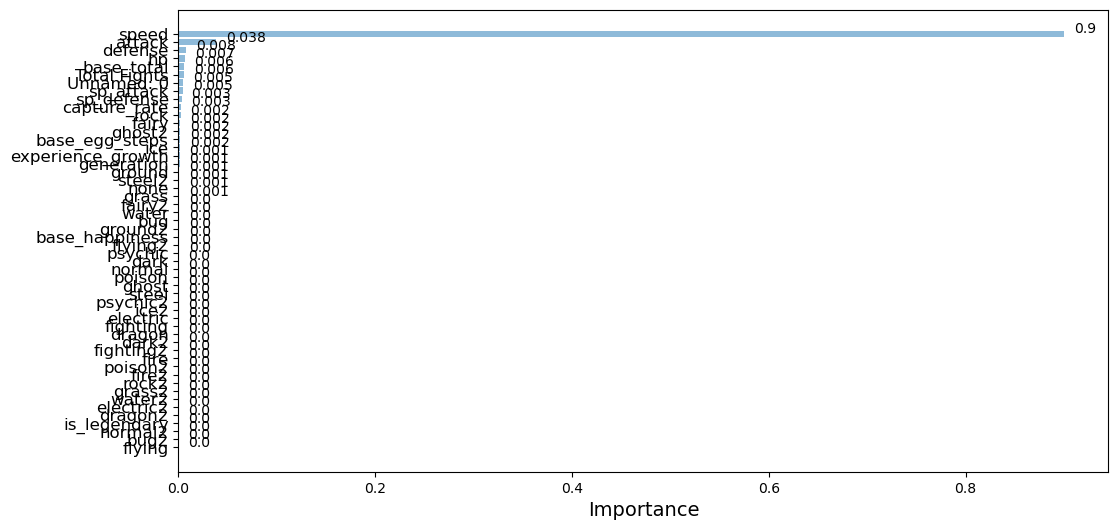

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error

# Load the Pokemon dataset
pokemon_df = pd.read_csv("pokemon_data_clean.csv")

# Drop the 'pokedex_number', 'Number', and 'name' columns as they are not relevant for regression
pokemon_df = pokemon_df.drop(['pokedex_number', 'Number', 'name'], axis=1)

# Split the data into features and labels
X = pokemon_df.drop(['Win Percentage'], axis=1)
y = pokemon_df['Win Percentage']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get the feature importances
importances = rf.feature_importances_

# Get the names of the features
feature_names = X.columns

# Sort the features by their importance
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the feature importances vs feature names
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(range(len(sorted_indices)), sorted_importances, alpha=0.5, label='Feature importance')
ax.set_yticks(range(len(sorted_indices)))
ax.set_yticklabels(sorted_feature_names, fontsize=12)
ax.set_xlabel('Importance', fontsize=14)
ax.invert_yaxis()

# Show the values of the feature importances
for i, v in enumerate(sorted_importances):
    ax.text(v + 0.01, i - 0.1, str(round(v, 3)), fontsize=10)

plt.show()


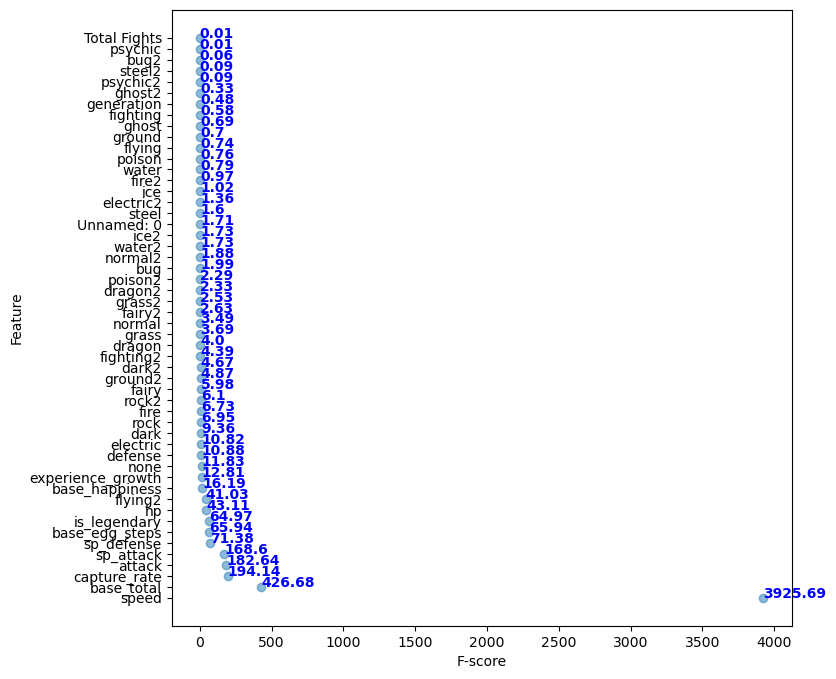

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt

# Load the Pokemon dataset
pokemon_df = pd.read_csv("pokemon_data_clean.csv")

# Drop the 'pokedex_number', 'Number', and 'name' columns as they are not relevant for regression
pokemon_df = pokemon_df.drop(['pokedex_number', 'Number', 'name'], axis=1)

# Split the data into features and labels
X = pokemon_df.drop(['Win Percentage'], axis=1)
y = pokemon_df['Win Percentage']

# Select the k best features based on F-score
selector = SelectKBest(score_func=f_regression, k=len(X.columns))
X_new = selector.fit_transform(X, y)

# Get the indices of the k best features
feature_indices = selector.get_support(indices=True)

# Get the feature importances based on the F-scores
importances = selector.scores_

# Sort the features by their importance
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]

# Get the names of the k best features
feature_names = X.columns[sorted_indices]

# Plot the F-score vs feature importance
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(importances[sorted_indices], range(len(sorted_indices)), alpha=0.5)
for i, v in enumerate(sorted_importances):
    ax.text(v, i, str(round(v,2)), color='blue', fontweight='bold')
ax.set_yticks(range(len(sorted_indices)))
ax.set_yticklabels(feature_names)
ax.set_xlabel('F-score')
ax.set_ylabel('Feature')
plt.show()


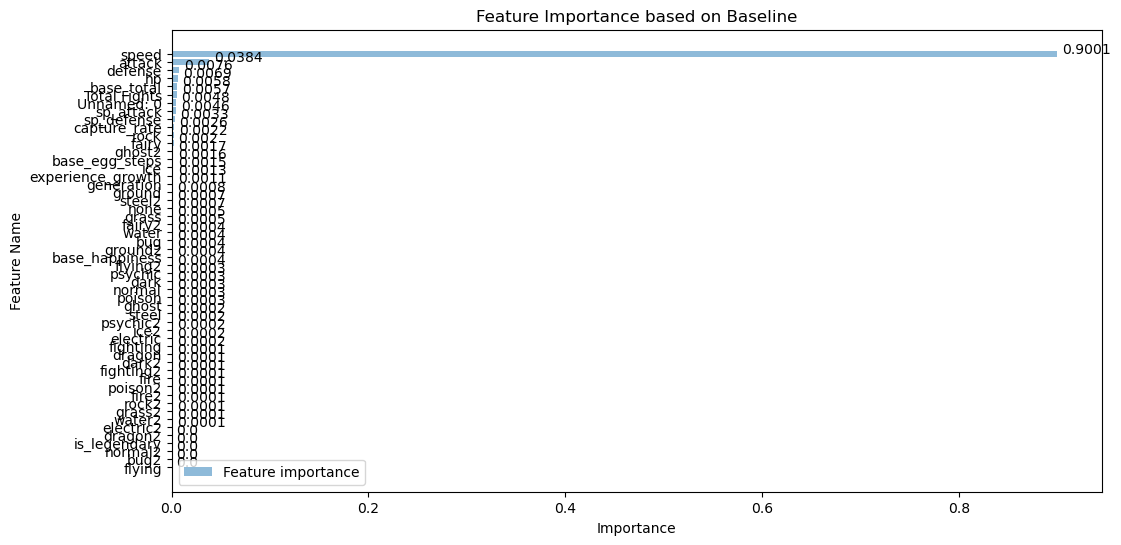

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load the Pokemon dataset
pokemon_df = pd.read_csv("pokemon_data_clean.csv")

# Drop the 'pokedex_number', 'Number', and 'name' columns as they are not relevant for regression
pokemon_df = pokemon_df.drop(['pokedex_number', 'Number', 'name'], axis=1)

# Split the data into features and labels
X = pokemon_df.drop(['Win Percentage'], axis=1)
y = pokemon_df['Win Percentage']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the random forest regressor model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Get the feature importances based on the mean decrease impurity
importances = rf.feature_importances_

# Sort the features by their importance
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]

# Get the names of the features
feature_names = X.columns[sorted_indices]

# Plot the feature importance based on the mean decrease impurity
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(range(len(sorted_indices)), sorted_importances, alpha=0.5, label='Feature importance')
ax.set_yticks(range(len(sorted_indices)))
ax.set_yticklabels(feature_names)
ax.invert_yaxis()
for i, v in enumerate(sorted_importances):
    ax.text(v + 0.005, i - 0.1, str(round(v, 4)))
ax.legend()
plt.title("Feature Importance based on Baseline")
plt.xlabel("Importance")
plt.ylabel("Feature Name")
plt.show()


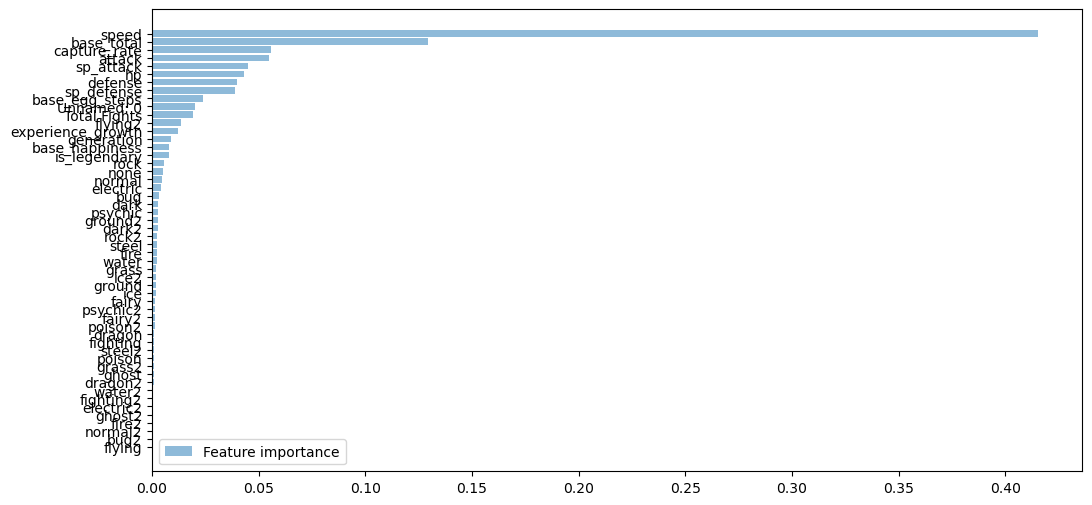

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import SVR
import matplotlib.pyplot as plt

# Load the Pokemon dataset
pokemon_df = pd.read_csv("pokemon_data_clean.csv")

# Drop the 'pokedex_number', 'Number', and 'name' columns as they are not relevant for regression
pokemon_df = pokemon_df.drop(['pokedex_number', 'Number', 'name'], axis=1)

# Split the data into features and labels
X = pokemon_df.drop(['Win Percentage'], axis=1)
y = pokemon_df['Win Percentage']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [10, 50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create a Random Forest Regressor
rf = RandomForestRegressor()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=5, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Get the feature importances based on the Random Forest Regressor model
importances = random_search.best_estimator_.feature_importances_

# Get the names of the features
feature_names = X.columns

# Sort the features by their importance
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]

# Plot the feature importances
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(range(len(sorted_indices)), sorted_importances, alpha=0.5, label='Feature importance')
ax.set_yticks(range(len(sorted_indices)))
ax.set_yticklabels(feature_names[sorted_indices])
ax.invert_yaxis()
ax.legend()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_15164\2421819534.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(feature_names, rotation=90)


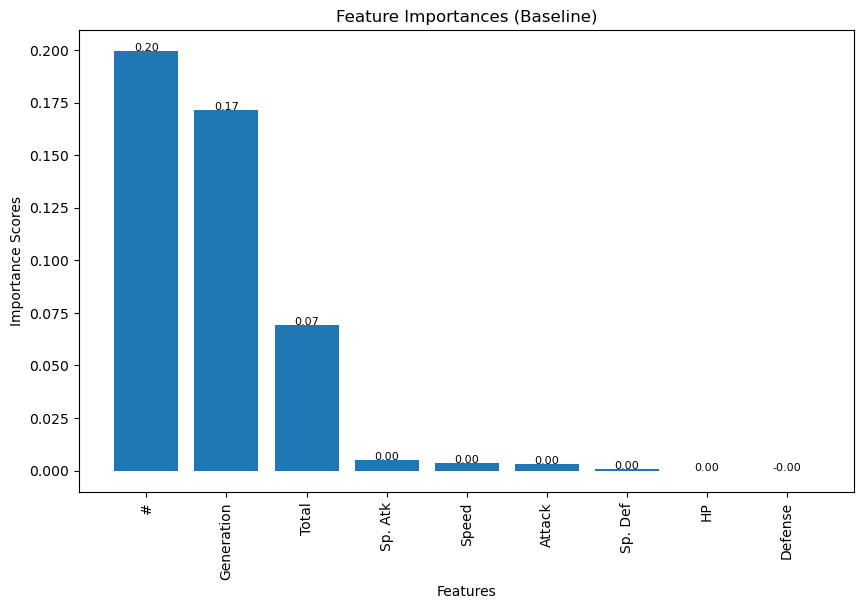

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("pokemon.csv")

# Preprocessing
df['Legendary'] = df['Legendary'].astype(int)
df = df.drop(columns=['Name', 'Type 1', 'Type 2'])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Legendary']),
                                                    df['Legendary'],
                                                    test_size=0.2,
                                                    random_state=42)

# Baseline model
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Calculate feature importances using permutation importance
result = permutation_importance(svm, X_train, y_train, n_repeats=10, random_state=42)

# Get feature importance scores and their corresponding feature names
importances = result.importances_mean
feature_names = df.drop(columns=['Legendary']).columns

# Sort the feature importance scores and feature names in descending order of importance scores
indices = np.argsort(importances)[::-1]
importances = importances[indices]
feature_names = feature_names[indices]

# Plot the feature importances for baseline model
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(feature_names, importances)
ax.set_title("Feature Importances (Baseline)")
ax.set_xlabel("Features")
ax.set_ylabel("Importance Scores")
ax.set_xticklabels(feature_names, rotation=90)
for i, v in enumerate(importances):
    ax.text(i, v, "{:.2f}".format(v), ha="center", fontsize=8)
plt.show()

# Randomized search
param_dist = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'degree': [2, 3, 4],
              'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7))}

svm_random = RandomizedSearchCV(estimator=svm, param_distributions=param_dist, n_iter=100,
                                cv=3, verbose=2, random_state=42, n_jobs=-1)

svm_random.fit(X_train, y_train)

# Calculate feature importances using permutation importance
result = permutation_importance(svm_random.best_estimator_, X_train, y_train, n_repeats=10, random_state=42)

# Get feature importance scores and their corresponding feature names
importances = result.importances_mean
feature_names = df.drop(columns=['Legendary']).columns

# Sort the feature importance scores and feature names in descending order of importance scores
indices = np.argsort(importances)[::-1]
importances = importances[indices]
feature_names = feature_names[indices]

# Plot the feature importances for random search model
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(feature_names, importances)
ax.set_title("Feature Importances (Random Search)")
ax.set_xlabel("Features")
ax.set_ylabel("Importance Scores")
ax.set_xticklabels(feature_names, rotation=90)
for i, v in enumerate(importances):
    ax.text(i, v, "{:.2f}".format(v), ha="center", fontsize=8)
plt.show()


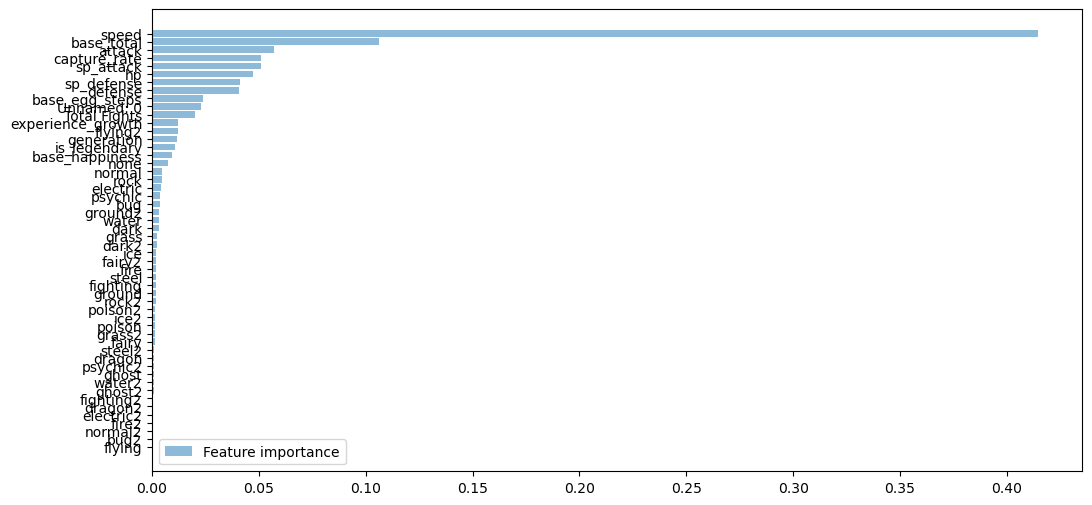

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load the Pokemon dataset
pokemon_df = pd.read_csv("pokemon_data_clean.csv")

# Drop the 'pokedex_number', 'Number', and 'name' columns as they are not relevant for regression
pokemon_df = pokemon_df.drop(['pokedex_number', 'Number', 'name'], axis=1)

# Split the data into features and labels
X = pokemon_df.drop(['Win Percentage'], axis=1)
y = pokemon_df['Win Percentage']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create a Random Forest Regressor
rf = RandomForestRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best Random Forest Regressor model from GridSearchCV
best_rf = grid_search.best_estimator_

# Fit the Random Forest Regressor model with all the training data
best_rf.fit(X_train, y_train)

# Get the feature importances based on the Random Forest Regressor model
importances = best_rf.feature_importances_

# Get the names of the features
feature_names = X.columns

# Sort the features by their importance
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]

# Plot the feature importances
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(range(len(sorted_indices)), sorted_importances, alpha=0.5, label='Feature importance')
ax.set_yticks(range(len(sorted_indices)))
ax.set_yticklabels(feature_names[sorted_indices])
ax.invert_yaxis()
ax.legend()
plt.show()


In [3]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Load the Pokemon dataset
pokemon_df = pd.read_csv("pokemon_data_clean.csv")

# Drop the 'pokedex_number', 'Number', and 'name' columns as they are not relevant for regression
pokemon_df = pokemon_df.drop(['pokedex_number', 'Number', 'name'], axis=1)

# Split the data into features and labels
X = pokemon_df.drop(['Win Percentage'], axis=1)
y = pokemon_df['Win Percentage']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Set up the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 'scale'],
    'kernel': ['linear', 'poly', 'rbf']
}

# Create an SVM regressor
svm = SVR()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameter values found by GridSearchCV
print("Best hyperparameters: ", grid_search.best_params_)

# Get the best SVM model based on the hyperparameter values found by GridSearchCV
best_svm = grid_search.best_estimator_

# Evaluate the best SVM model on the test data
test_score = best_svm.score(X_test, y_test)
print("Test R^2 score: ", test_score)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters:  {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Test R^2 score:  0.9041043625793795


## Importing that dataset 

I will be using the dataset my teammate Sabrina has cleaned and precprocess to implement a Random Forest Regressor model 

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import pandas as pd
import numpy as np

# load the data into a DataFrame
pokemon = pd.read_csv("data/pokemon_data_clean.csv")

print("Number of observations in dataset: {}".format(pokemon.shape[0]))

pokemon.head()


Number of observations in dataset: 688


,Unnamed: 0,pokedex_number,Number,name,attack,defense,sp_attack,sp_defense,speed,hp,...,grass2,ground2,ice2,none,normal2,poison2,psychic2,rock2,steel2,water2
0,0,1,1.0,Bulbasaur,49,49,65,65,45,45,...,0,0,0,0,0,1,0,0,0,0
1,1,2,2.0,Ivysaur,62,63,80,80,60,60,...,0,0,0,0,0,1,0,0,0,0
2,2,3,3.0,Venusaur,100,123,122,120,80,80,...,0,0,0,0,0,1,0,0,0,0
3,3,4,5.0,Charmander,52,43,60,50,65,39,...,0,0,0,1,0,0,0,0,0,0
4,4,5,6.0,Charmeleon,64,58,80,65,80,58,...,0,0,0,1,0,0,0,0,0,0


In [42]:
print(pokemon.columns)

Index(['Unnamed: 0', 'pokedex_number', 'Number', 'name', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'hp', 'base_total',
       'base_egg_steps', 'base_happiness', 'capture_rate', 'experience_growth',
       'generation', 'is_legendary', 'Total Fights', 'Win Percentage', 'bug',
       'dark', 'dragon', 'electric', 'fairy', 'fighting', 'fire', 'flying',
       'ghost', 'grass', 'ground', 'ice', 'normal', 'poison', 'psychic',
       'rock', 'steel', 'water', 'bug2', 'dark2', 'dragon2', 'electric2',
       'fairy2', 'fighting2', 'fire2', 'flying2', 'ghost2', 'grass2',
       'ground2', 'ice2', 'none', 'normal2', 'poison2', 'psychic2', 'rock2',
       'steel2', 'water2'],
      dtype='object')


I will be removing the "Unnamed: 0" column as I believe that it is the same as the the "pokedex_number" column except it starts at 0 instead of 1. I will also be droping the "name" column since we can reference the pokemon using pokedex_number value

In [43]:
pokemon = pokemon.drop(["Unnamed: 0", "name", "pokedex_number", "Number"], axis = 1)

In [44]:
pokemon.head()

,attack,defense,sp_attack,sp_defense,speed,hp,base_total,base_egg_steps,base_happiness,capture_rate,...,grass2,ground2,ice2,none,normal2,poison2,psychic2,rock2,steel2,water2
0,49,49,65,65,45,45,318,5120,70,45,...,0,0,0,0,0,1,0,0,0,0
1,62,63,80,80,60,60,405,5120,70,45,...,0,0,0,0,0,1,0,0,0,0
2,100,123,122,120,80,80,625,5120,70,45,...,0,0,0,0,0,1,0,0,0,0
3,52,43,60,50,65,39,309,5120,70,45,...,0,0,0,1,0,0,0,0,0,0
4,64,58,80,65,80,58,405,5120,70,45,...,0,0,0,1,0,0,0,0,0,0


## Split the dataset into training and test data

In [45]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

np.random.seed(56)

# Shuffle the dataset
X = pokemon.drop(["Win Percentage"], axis = 1)
y = pokemon["Win Percentage"]

shuffled_X, shuffled_y = shuffle(X, y)

X_train, X_test, y_train, y_test = train_test_split(shuffled_X, shuffled_y, test_size = 0.2)

## Standardize the dataset

I will standardize the dataset before implementing Random Forest Regressor

## Base Random Forest

At this point, we are ready to create a Random Forest Regressor. I will be using a Random Forest Regressor with default hyperparameters and compare it against a tuned Random Forest Regressor.

In [46]:
def evaluate_metrics(y_test, y_preds):
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    
    return {
        "r2": r2_score(y_test, y_preds),
        "mae": mean_absolute_error(y_test, y_preds),
        "mse": mean_squared_error(y_test, y_preds)
    }

In [47]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(56)

baserf = RandomForestRegressor()

baserf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [62]:
from sklearn.model_selection import cross_validate

scores = cross_validate(baserf, shuffled_X, shuffled_y, cv= 5, scoring=('r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'), return_train_score=True, return_estimator = True)

base_metrics = { 
    "r2": np.absolute(scores["test_r2"].mean()),
    "mae": np.absolute(scores["test_neg_mean_absolute_error"].mean()),
    "mse": np.absolute(scores["test_neg_mean_squared_error"].mean())
}

print(base_metrics)
base_importances = np.mean([estimator.feature_importances_ for estimator in scores['estimator']], axis=0)

#baserf.fit(X_train, y_train)
#base_y_preds = baserf.predict(X_test)
#print(evaluate_metrics(y_test, base_y_preds))
#base_metrics

{'r2': 0.9239421004368987, 'mae': 0.04878132563666286, 'mse': 0.004502646288614957}


From creating a "untuned" Random Forest Regressor, we are getting great results for our model. 

## Hyper Parameter Tuning

### Random Search CV (5-Fold)

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline

np.random.seed(56)

pipeline = Pipeline([
    ('regressor', RandomForestRegressor())  # Step 1: Modeling (RandomForestRegressor)
])

random_params = {
    'regressor__n_estimators': np.linspace(10, 500, 25, dtype=int).tolist(),
    'regressor__max_depth': np.linspace(1, 40, 10, dtype=int).tolist() + [ None ], # 14
    'regressor__criterion': ["squared_error", "absolute_error", "friedman_mse", "poisson"], # 4
    'regressor__min_samples_split': np.linspace(2, 20, 10, dtype=int).tolist(), # 10
    'regressor__min_samples_leaf': np.linspace(1, 10, 1, dtype=int).tolist(), # 5
    'regressor__max_features': np.linspace(1, 8, 8, dtype = int).tolist() +  [None, "sqrt", "log2"],
    'regressor__bootstrap': [True, False] # 2
}

# Create Randomized Search object
random_search = RandomizedSearchCV(pipeline, param_distributions=random_params, n_iter = 200, cv = 5)
random_search.fit(X_train, y_train)

random_search.best_params_

{'regressor__n_estimators': 500,
 'regressor__min_samples_split': 6,
 'regressor__min_samples_leaf': 1,
 'regressor__max_features': None,
 'regressor__max_depth': 35,
 'regressor__criterion': 'poisson',
 'regressor__bootstrap': True}

In [11]:
random_y_preds = random_search.best_estimator_.predict(X_test)

random_search_metrics = evaluate_metrics(y_test, random_y_preds)

random_search_metrics

{'r2': 0.9331267776119034,
 'mae': 0.048613744104687225,
 'mse': 0.004101225466224364}

### Grid Search CV (5 - Fold)

In [12]:
import sys
from sklearn.model_selection import GridSearchCV

grid_params = {
    'regressor__n_estimators': [300, 400, 500, 600, 700, 800],
    'regressor__max_depth': [20, 30, 40, 50, 60, 70], # 14
    'regressor__criterion': ["squared_error", "absolute_error", "friedman_mse", "poisson"], # 4
    'regressor__min_samples_split': [5, 6, 7, 8, 9], # 10
    'regressor__min_samples_leaf': [1, 3, 5], # 5
    'regressor__max_features': [None],
    'regressor__bootstrap': [True, False] # 2
}

"""
    grid_params = {
    'regressor__n_estimators': [60, 70, 80, 90, 100, 110],
    'regressor__min_samples_split': [5, 7, 9],
    'regressor__min_samples_leaf': [1, 2, 4, 5, 6],
    'regressor__max_features': [None, 1, 2, 3, 4, 5, 6, 7],
    'regressor__max_depth': [1, 2, 4, 6 ,8, 10],
}
"""
# Redirect the verbose output to a file

grid_search = GridSearchCV(pipeline, grid_params, cv = 5, n_jobs = 14)  # Use 5-fold cross-validation

grid_search.fit(X_train, y_train)

grid_search.best_params_

{'regressor__bootstrap': True,
 'regressor__criterion': 'absolute_error',
 'regressor__max_depth': 20,
 'regressor__max_features': None,
 'regressor__min_samples_leaf': 1,
 'regressor__min_samples_split': 5,
 'regressor__n_estimators': 500}

In [13]:
grid_y_preds = grid_search.best_estimator_.predict(X_test)

grid_search_metrics = evaluate_metrics(y_test, grid_y_preds)

In [14]:
results = pd.DataFrame({
    "baseline": base_metrics,
    "random search": random_search_metrics,
    "grid search": grid_search_metrics
})

results.columns.tolist()

['baseline', 'random search', 'grid search']

## Graphing Evaluation Metrics

In [15]:
def graph_metrics(data, metric, ax):
    import seaborn as sns

    # Create a bar plot using Seaborn
    sns.set_style("whitegrid")

    
    temp = { 
        "Approach": data.columns.tolist(),
        "metric": results.loc[metric]
    }
    
    # Convert the dictionary to a pandas DataFrame
    df = pd.DataFrame(temp)

    # Create a bar plot using seaborn
    sns.barplot(x='Approach', y='metric', data = df, ax = ax)    
    
    # Add actual values on top of the bar graphs
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline')
    
    ax.set_ylabel("'{}' metric".format(metric))

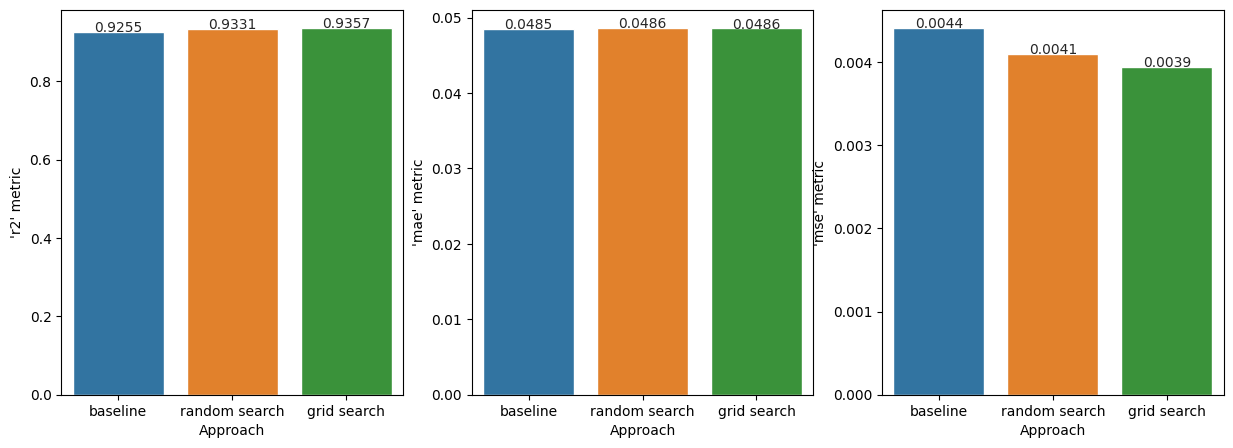

In [16]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize= (15,5))

graph_metrics(results, "r2", axs[0])
graph_metrics(results, "mae", axs[1])
graph_metrics(results, "mse", axs[2])

## Graphing Feature Importance Based on Best Model

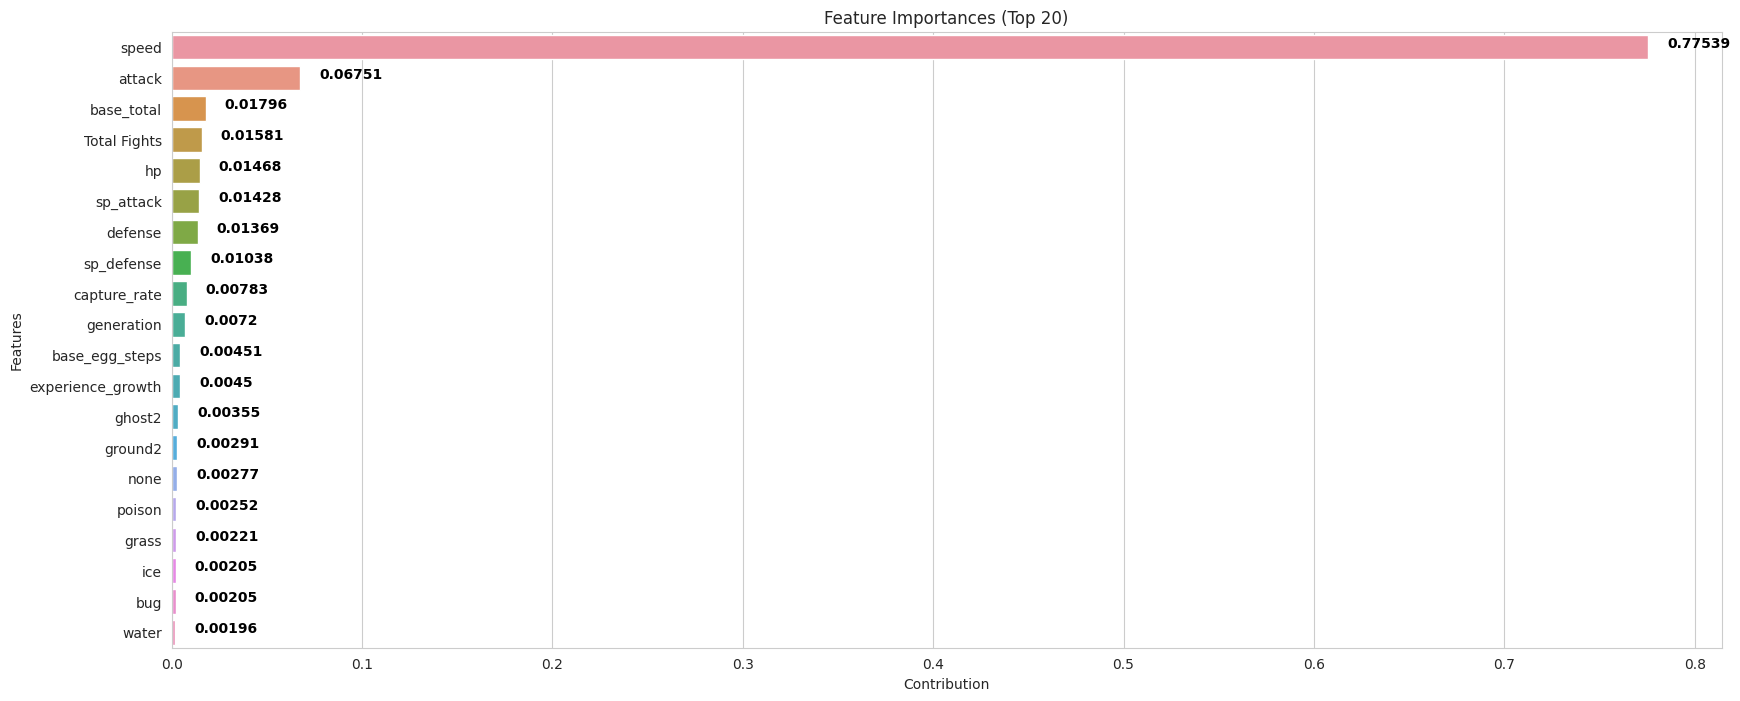

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the feature importances
importances = grid_search.best_estimator_._final_estimator.feature_importances_

# Sort the feature importances in descending order
# Rearrange the feature names so they match the sorted feature importances
feature_names = X.columns
sorted_idx = importances.argsort()[::-1]
sorted_importances = importances[sorted_idx]
sorted_feature_names = feature_names[sorted_idx]

# Select the top 20 most important features
top_k = 20
sorted_importances_top_k = sorted_importances[:top_k]
sorted_feature_names_top_k = sorted_feature_names[:top_k]

# Create a horizontal bar plot using Seaborn
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(x=sorted_importances_top_k, y=sorted_feature_names_top_k, ax=ax)

# Add the value of the feature importance on top of each bar
for i, v in enumerate(sorted_importances_top_k):
    ax.text(v + 0.01, i, str(round(v, 5)), color='black', fontweight='bold')

plt.title('Feature Importances (Top 20)')
plt.ylabel('Features')
plt.xlabel('Contribution')
plt.show()


## Graph Feature Importances (All Models)

Text(0.5, 0.98, 'Feature Importance (Top 20)')

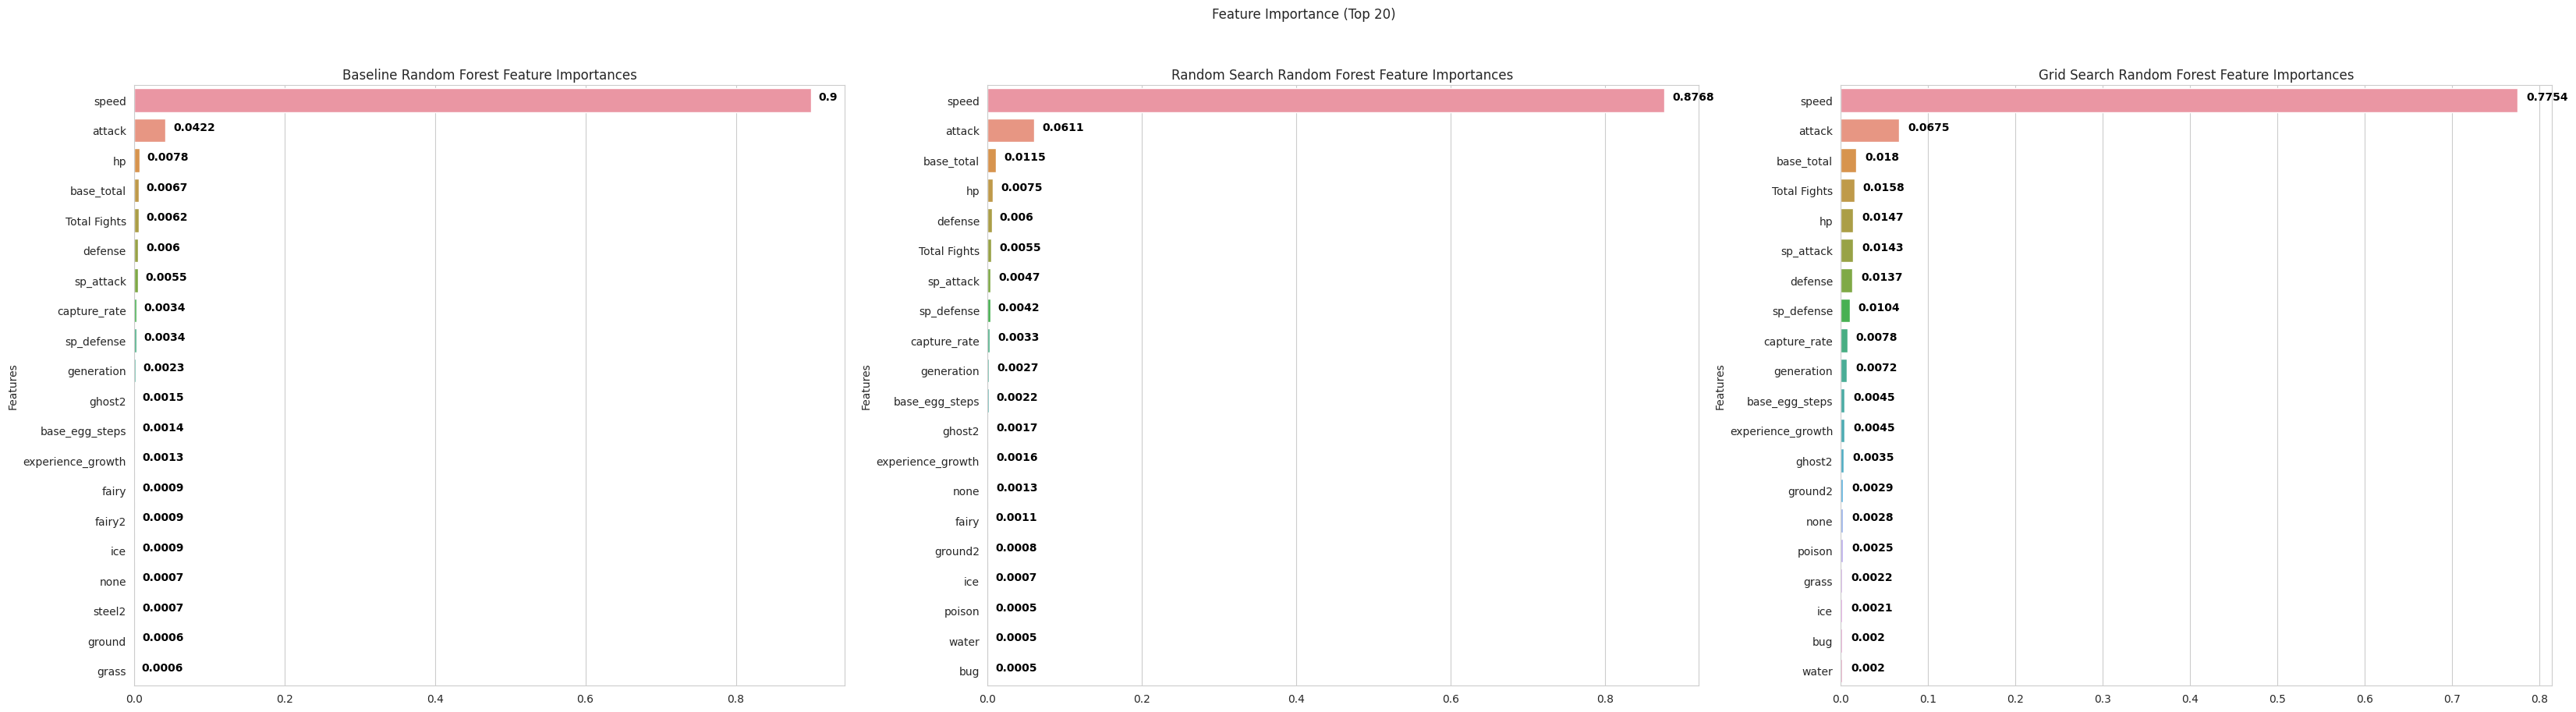

In [68]:
def graph_importance(feat_importance, model_name, dataset, top, ax):
    # Get the feature importances
    importances = feat_importance

    # Sort the feature importances in descending order
    # Rearrange the feature names so they match the sorted feature importances
    feature_names = dataset.columns
    sorted_idx = importances.argsort()[::-1]
    sorted_importances = importances[sorted_idx]
    sorted_feature_names = feature_names[sorted_idx]

    # Select the top 20 most important features
    sorted_importances_top_k = sorted_importances[:top]
    sorted_feature_names_top_k = sorted_feature_names[:top]

    # Create a horizontal bar plot using Seaborn
    sns.set_style('whitegrid')
    sns.barplot(x=sorted_importances_top_k, y=sorted_feature_names_top_k, ax=ax)

    # Add the value of the feature importance on top of each bar
    for i, v in enumerate(sorted_importances_top_k):
        ax.text(v + 0.01, i, str(round(v, 4)), color='black', fontweight='bold')
        
    ax.set_ylabel("Features")

    ax.set_title(f"{model_name} Feature Importances")

fig, axs = plt.subplots(1,3,figsize=(40, 10))
        
graph_importance(base_importances, "Baseline Random Forest", X, 20, axs[0])
graph_importance(random_search.best_estimator_._final_estimator.feature_importances_, "Random Search Random Forest", X, 20, axs[1])
graph_importance(grid_search.best_estimator_._final_estimator.feature_importances_, "Grid Search Random Forest", X, 20, axs[2])

fig.suptitle("Feature Importance (Top 20)")

# Pokemon_XGBoost

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [4]:
poke = pd.read_csv("E:/CAP5768/project/pokemon_data_clean.csv")
poke.shape, poke.columns

((688, 56),
 Index(['Unnamed: 0', 'pokedex_number', 'Number', 'name', 'attack', 'defense',
        'sp_attack', 'sp_defense', 'speed', 'hp', 'base_total',
        'base_egg_steps', 'base_happiness', 'capture_rate', 'experience_growth',
        'generation', 'is_legendary', 'Total Fights', 'Win Percentage', 'bug',
        'dark', 'dragon', 'electric', 'fairy', 'fighting', 'fire', 'flying',
        'ghost', 'grass', 'ground', 'ice', 'normal', 'poison', 'psychic',
        'rock', 'steel', 'water', 'bug2', 'dark2', 'dragon2', 'electric2',
        'fairy2', 'fighting2', 'fire2', 'flying2', 'ghost2', 'grass2',
        'ground2', 'ice2', 'none', 'normal2', 'poison2', 'psychic2', 'rock2',
        'steel2', 'water2'],
       dtype='object'))

In [5]:
### remove id columns and split target value

data = poke.drop(['Unnamed: 0', 'pokedex_number', 'Number', 'name'], axis = 1)
X = data.drop(["Win Percentage"], axis = 1)
y = data['Win Percentage']

X.shape, y.shape

((688, 51), (688,))

In [6]:
### split training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((550, 51), (138, 51), (550,), (138,))

important consistancies

evaluation metrics: r2, MAE, MSE
test size: .20
doing both radnom and grid search

In [7]:
### performace evaluation

def evaluate_metrics(y_test, y_preds):
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    
    return {
        "r2": r2_score(y_test, y_preds),
        "mae": mean_absolute_error(y_test, y_preds),
        "mse": mean_squared_error(y_test, y_preds)
    }

## Base line XGBoost

In [8]:
from xgboost import XGBRegressor

baseXGB = XGBRegressor()
baseXGB.fit(X_train, y_train)

baseXGB_y_preds = baseXGB.predict(X_test)

baseXGB_metrics = evaluate_metrics(y_test, baseXGB_y_preds)

baseXGB_metrics

{'r2': 0.9085742644889085,
 'mae': 0.04798329210941091,
 'mse': 0.005022129949665635}

## Random Hyperparameter Pipline

Parameters:

Objective:
    reg:squarederror: regression with squared loss. (replaces reg linear)
    reg:absoluteerror: Regression with L1 error. When tree model is used, leaf value is refreshed after tree construction. If used in distributed training, the leaf value is calculated as the mean value from all workers, which is not guaranteed to be optimal.
    reg:logistic: logistic regression.

n_estimators (int) – Number of gradient boosted trees. Equivalent to number of boosting rounds.
max_depth (Optional[int]) – Maximum tree depth for base learners.
learning_rate (Optional[float]) – Boosting learning rate (xgb’s “eta”)
reg_alpha (Optional[float]) – L1 regularization term on weights (xgb’s alpha).
reg_lambda (Optional[float]) – L2 regularization term on weights (xgb’s lambda).


In [51]:
from random import seed
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(16)
xgb1 = XGBRegressor()
parameters = {'objective':['reg:squarederror', 'reg:absoluteerror', 'reg:logistic'],
              'learning_rate': [0.01, 0.5, 1], #so called `eta` value
              'max_depth': [3, 5, 7],
              'reg_lambda': [0.1, 0.001, 0.0001],
              'alpha': [0, 1, 5],
              'n_estimators': [200, 400]}

xgb_random = RandomizedSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_random.fit(X_train, y_train)

print(xgb_random.best_score_)
print(xgb_random.best_params_)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
0.9202763189156608
{'reg_lambda': 0.0001, 'objective': 'reg:absoluteerror', 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.01, 'alpha': 5}


In [50]:
print(xgb_random.best_estimator_)

XGBRegressor(alpha=5, base_score=0.44236243, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, objective='reg:absoluteerror', ...)


In [49]:
randXGB_y_preds = xgb_random.best_estimator_.predict(X_test)

randXGB_metrics = evaluate_metrics(y_test, randXGB_y_preds)

randXGB_metrics

{'r2': 0.9229262505582556,
 'mae': 0.04495688711034166,
 'mse': 0.0042337574124022325}

In [12]:
randXGB_model = xgb_random.best_estimator_.feature_importances_
randXGB_model

array([4.82946038e-02, 7.00531621e-03, 5.67975547e-03, 5.67087391e-03,
       6.01356149e-01, 7.29471445e-03, 6.65627141e-03, 9.73036233e-03,
       6.03166642e-03, 6.41523860e-03, 3.78314755e-03, 8.89181159e-03,
       3.04517057e-03, 6.33382844e-03, 8.35185871e-03, 9.37182922e-03,
       2.20116787e-03, 5.63929603e-03, 3.43334686e-04, 9.36766434e-03,
       1.49933703e-03, 0.00000000e+00, 1.15382895e-02, 1.82379270e-03,
       3.45900320e-02, 2.14237440e-02, 4.71891789e-03, 1.73401437e-03,
       6.39565429e-03, 3.23037500e-03, 3.98179633e-04, 4.74186876e-04,
       0.00000000e+00, 2.62592104e-04, 1.75764039e-03, 0.00000000e+00,
       1.79181783e-03, 0.00000000e+00, 8.05051750e-05, 9.59167723e-03,
       8.92756805e-02, 2.36158667e-04, 1.93855762e-02, 3.30191979e-04,
       3.87714244e-03, 0.00000000e+00, 5.20609971e-03, 5.07145072e-04,
       3.47606721e-04, 1.18138762e-02, 6.24564989e-03], dtype=float32)

## GridSearch Hyperparameter Pipline

In [13]:
from sklearn.model_selection import GridSearchCV

seed(2)
xgb1 = XGBRegressor()
parameters = {'objective':['reg:squarederror', 'reg:absoluteerror', 'reg:logistic'],
              'learning_rate': [0.01, 0.5, 1], #so called `eta` value
              'max_depth': [3, 5, 7],
              'reg_lambda': [0.1, 0.001, 0.0001],
              'alpha': [0, 1, 5],
              'n_estimators': [200, 400]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 486 candidates, totalling 972 fits
0.9276074368588016
{'alpha': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 400, 'objective': 'reg:logistic', 'reg_lambda': 0.001}


In [14]:
gridXGB_y_preds = xgb_grid.best_estimator_.predict(X_test)

gridXGB_metrics = evaluate_metrics(y_test, gridXGB_y_preds)

gridXGB_metrics

{'r2': 0.9082412502673914,
 'mae': 0.04769390306953062,
 'mse': 0.005040422837179162}

## Results

In [52]:
results = pd.DataFrame({
    "baseline": baseXGB_metrics,
    "random search": randXGB_metrics,
    "grid search": gridXGB_metrics
})

results

,baseline,random search,grid search
r2,0.908574,0.922926,0.908241
mae,0.047983,0.044957,0.047694
mse,0.005022,0.004234,0.005040


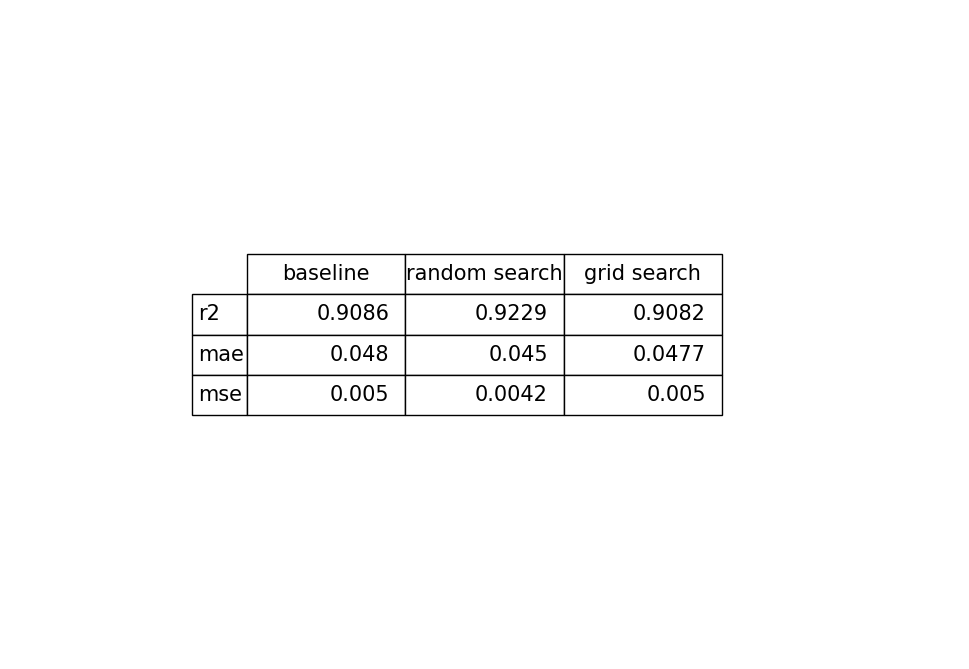

In [53]:
fig, ax = plt.subplots()

#hide the axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

#create table
table = ax.table(cellText=np.round(results.values, 4), colLabels=results.columns, rowLabels=results.index, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(15)
table.scale(.5,2)
#display table
fig.tight_layout()
plt.show()

Text(0.5, 0, 'Xgboost Feature Importance')

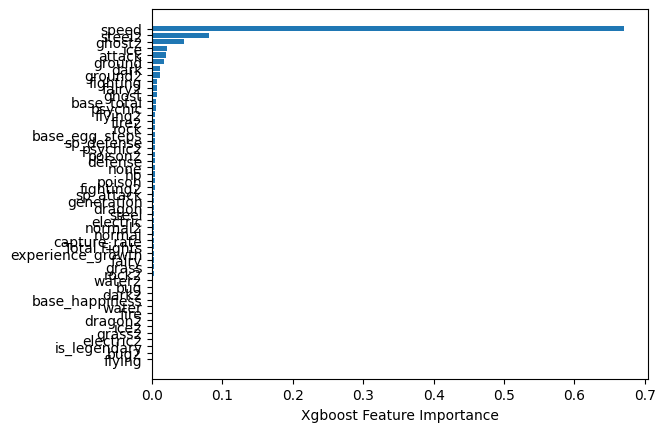

In [56]:
sorted_idx = baseXGB.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], baseXGB.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

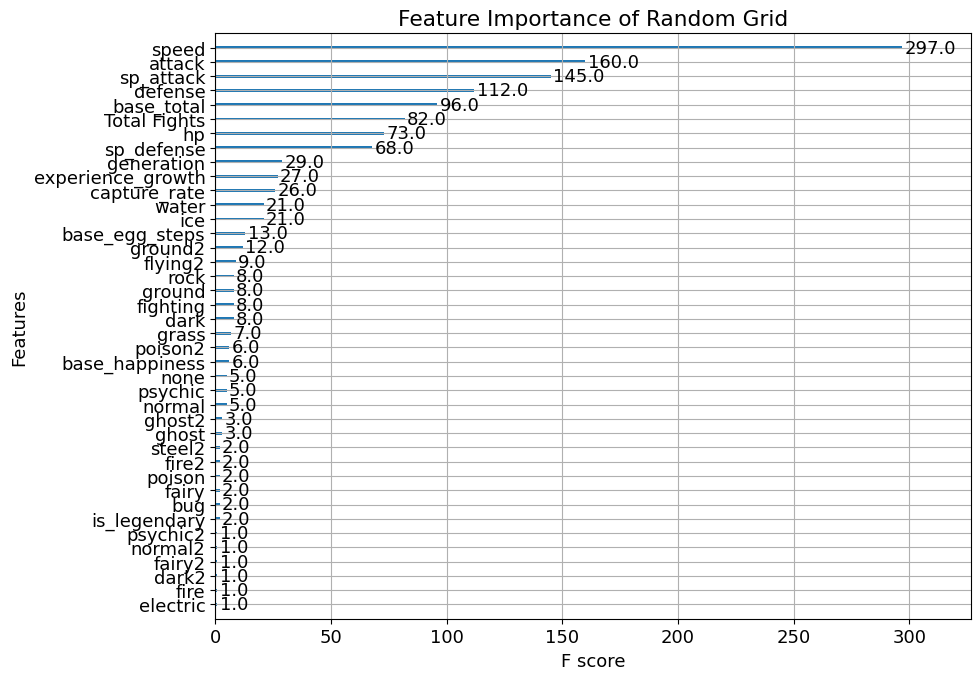

In [56]:
from xgboost import plot_importance

plt.rcParams["figure.figsize"] = [10, 7]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 13})

plot_importance(xgb_random.best_estimator_)
plt.title('Feature Importance of Random Grid')
plt.show()

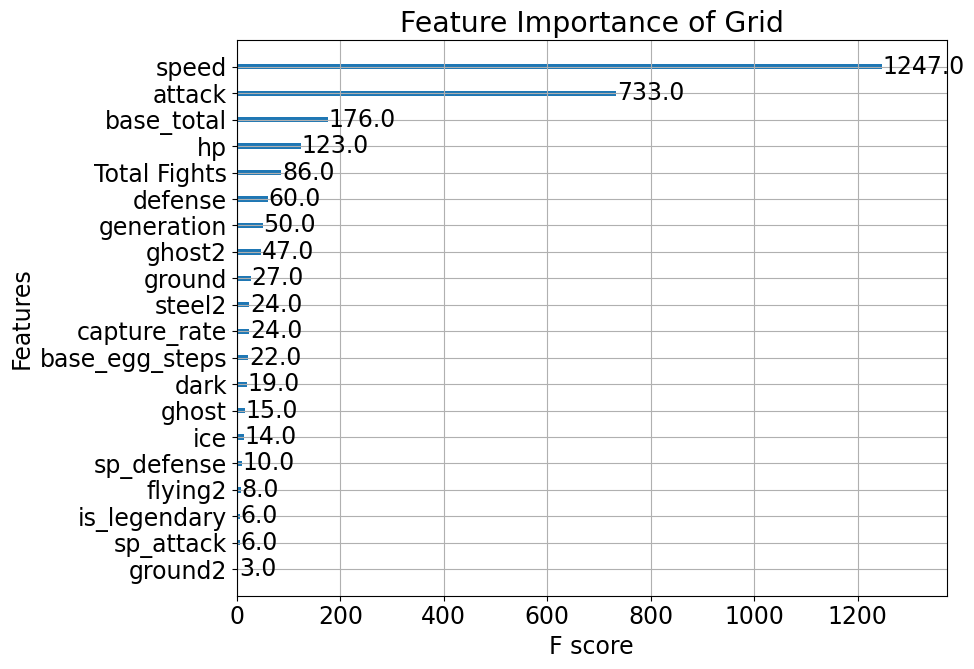

In [61]:
from xgboost import plot_importance

plt.rcParams["figure.figsize"] = [10, 7]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 17})

plot_importance(xgb_grid.best_estimator_)
plt.title('Feature Importance of Grid')
plt.show()

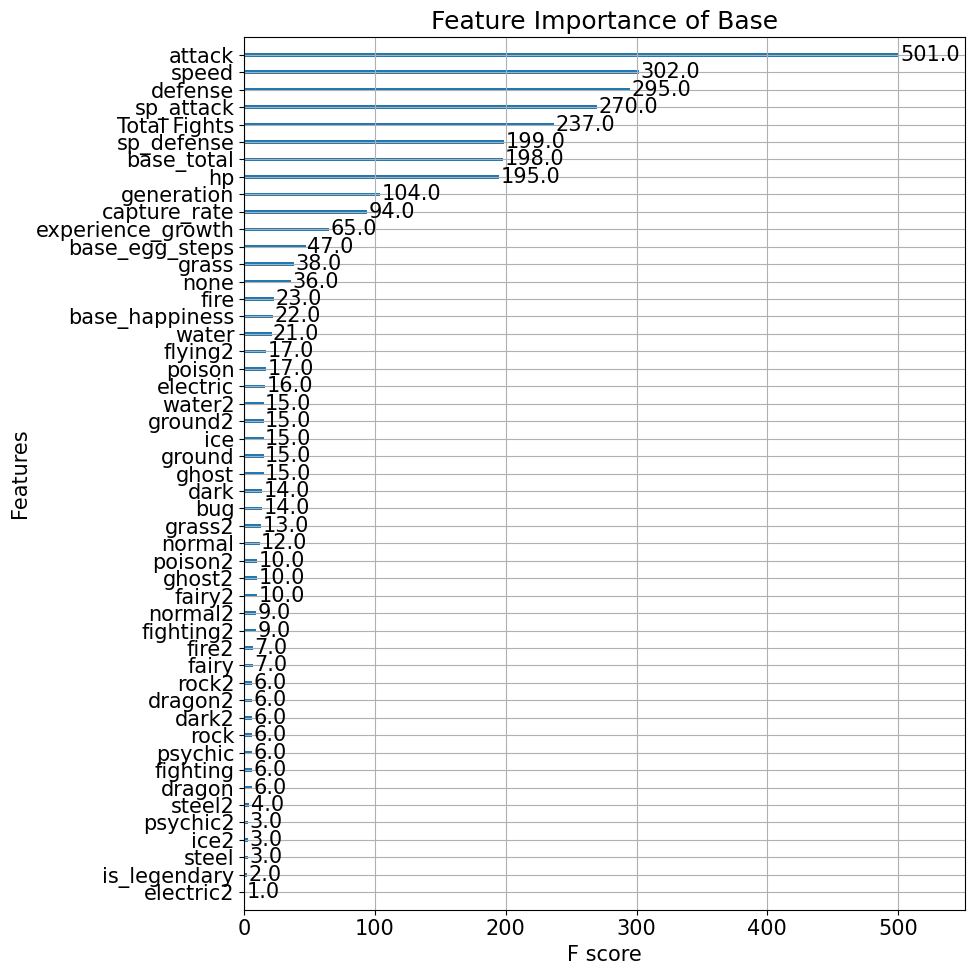

In [62]:
from xgboost import plot_importance

plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})

plot_importance(baseXGB)
plt.title('Feature Importance of Base')
plt.show()